![](https://i.imgur.com/1bwu4w5.png)
<h1><center>📉GGplot 101: Ultimate CheatSheet📈</center></h1>

# 1. Introduction

Yes, this is just that: I made this code especially just for the purpose to **copy-paste** it. I worked quite a lot with *GGplot* in the last fiew weeks and I got tired to look up for the same things all over again 😅 (or to reference my own notebooks, at least now I get to reference only one).

Plots are made on **Avocado** and **Pokemon** datasets available here on Kaggle (I would suggest not to try to interpret them, I just used them for the purpose of example).

### References you might want to check out:
1. If you like **COLOR** as much as I do (I used different palettes for every chapter): https://htmlcolorcodes.com/
2. For more **theme** changes (I made myself a custom, but you maybe want something different): https://ggplot2.tidyverse.org/reference/theme.html
3. Absolutely **awesome** GGplot tamplates: http://www.sthda.com/english/wiki/be-awesome-in-ggplot2-a-practical-guide-to-be-highly-effective-r-software-and-data-visualization
4. Here more **color schemes**: https://juiceboxinteractive.com/blog/color/. I prefer to use color schemes because I don't have a good eye for matching colors, but I believe that it should be complementary and clean to the eye. In this notebook I use quite a fiew different color schemes, but you can change them as your heart ❤ desires.
5. Color Hunt Palletes: https://colorhunt.co/


<div class="alert alert-block alert-success">  
<strong>Some Bonuses:</strong>
<p><code>ggsave("plot_name.jpeg")</code> - to save the image you created</p>
<p><code>ggrepel</code> - easy library to add labels to the graph</p>
<p><code>guide = "none"</code> - write this in the <code>scale_fill_manual()</code> or <code>scale_color_manual()</code> to erase the legend</p>
</div>

### Enjoy! 😄

In [1]:
# Libraries
install.packages("naniar")
system("sudo apt-get -y install libmagick++-dev", intern=TRUE)
install.packages("magick", verbose=TRUE)

library(ggplot2) # plot library
library(tidyverse) # for data manipulation
library(gridExtra) # multiple plots in 1
library(magick) # attach dope image for visual
library(scales) # show the colors
library(ggrepel) # for graph repel (labels)
library(hexbin) # for hive scatter
library(naniar) # to check for missing data

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
  [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
  [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
  [5] "  javascript-common libcdt5 libcgraph6 libdjvulibre-dev libexif-dev libexif12"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
  [6] "  libgd3 libgraphviz-dev libgts-0.7-5 libgts-bin libgvc6 libgvc6-plugins-gtk"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
  [7] "  libgvpr2 libjs-jquery liblcms2-dev liblqr-1-0-dev libmagick++-6-headers"                                             

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

system (cmd0): /usr/local/lib/R/bin/R CMD INSTALL

foundpkgs: magick, /tmp/RtmpyQIQTI/downloaded_packages/magick_2.4.0.tar.gz

files: /tmp/RtmpyQIQTI/downloaded_packages/magick_2.4.0.tar.gz

1): succeeded '/usr/local/lib/R/bin/R CMD INSTALL -l '/usr/local/lib/R/site-library' /tmp/RtmpyQIQTI/downloaded_packages/magick_2.4.0.tar.gz'

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ tibble  2.1.3     ✔ purrr   0.3.3
✔ tidyr   1.0.0     ✔ dplyr   0.8.3
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  2.1.3     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Linking to ImageMagick 6.9.7.4
Enabled features: fontconfig, freetype, fftw, lcms, pango, x11
D

In [2]:
# Check available files
list.files(path = "../input")

[1] "avocado-prices" "pokemon"

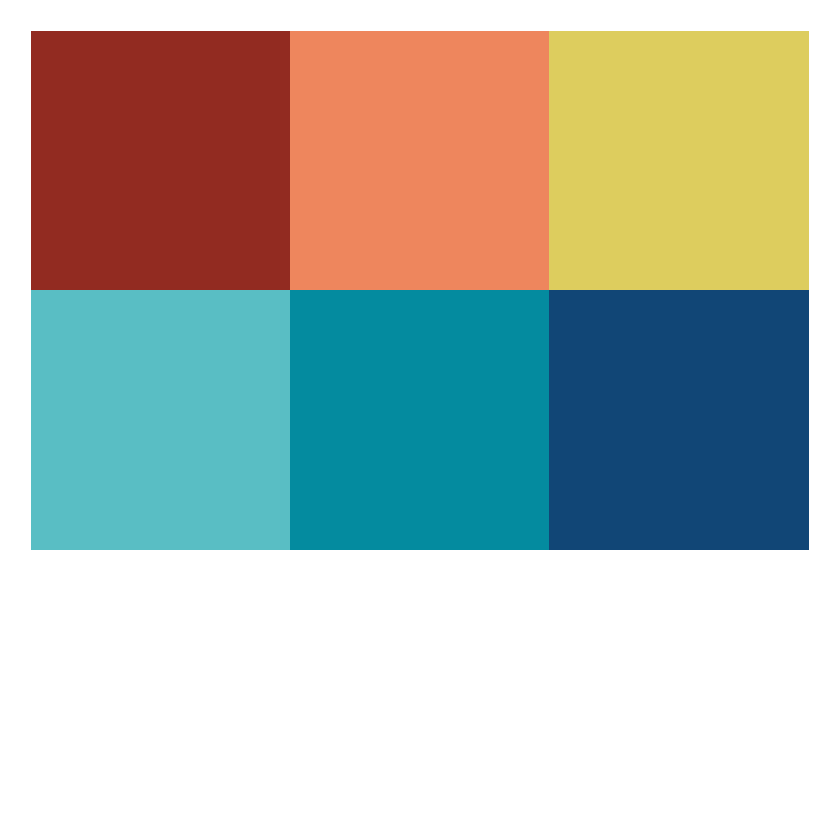

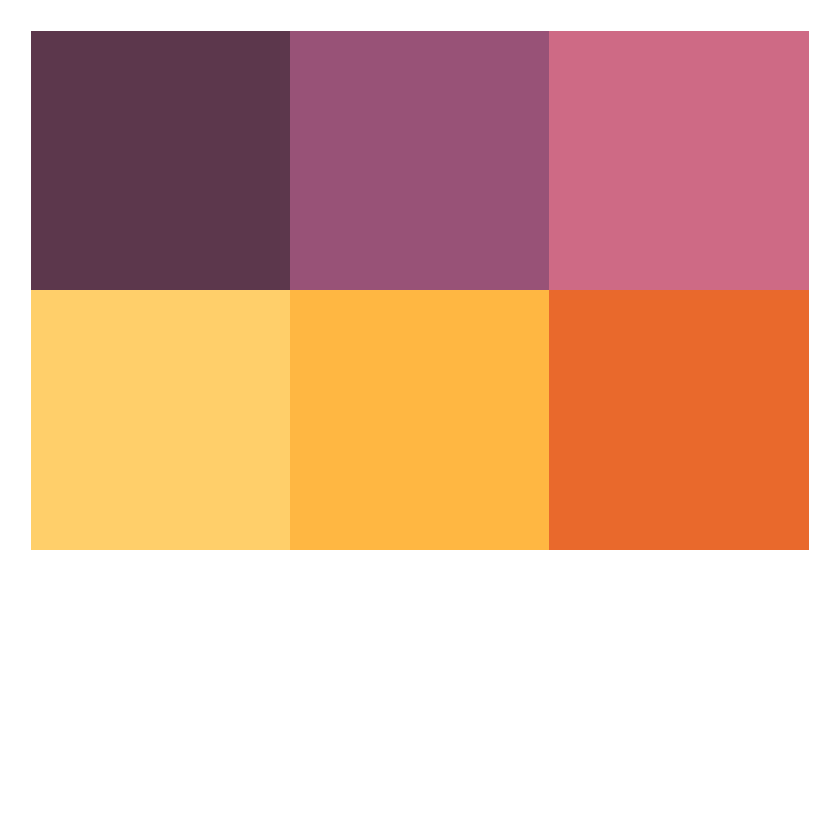

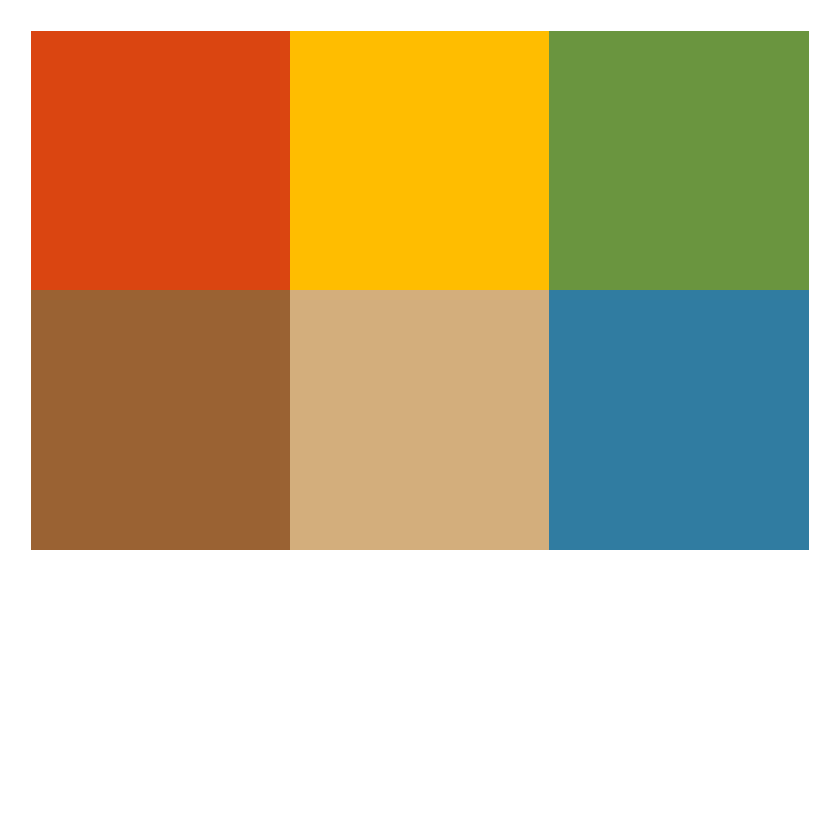

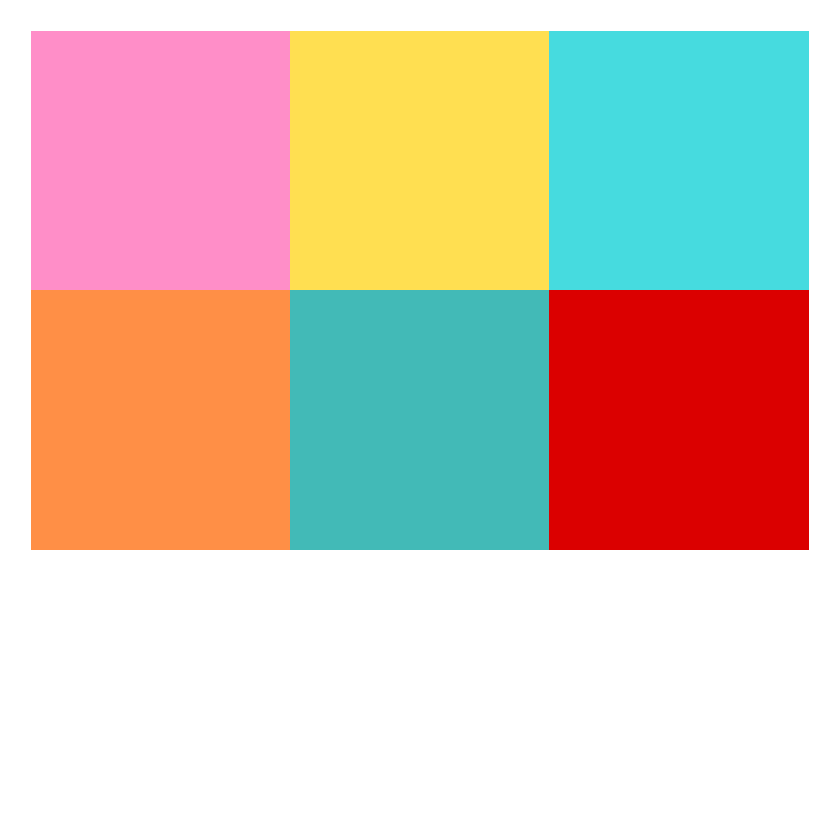

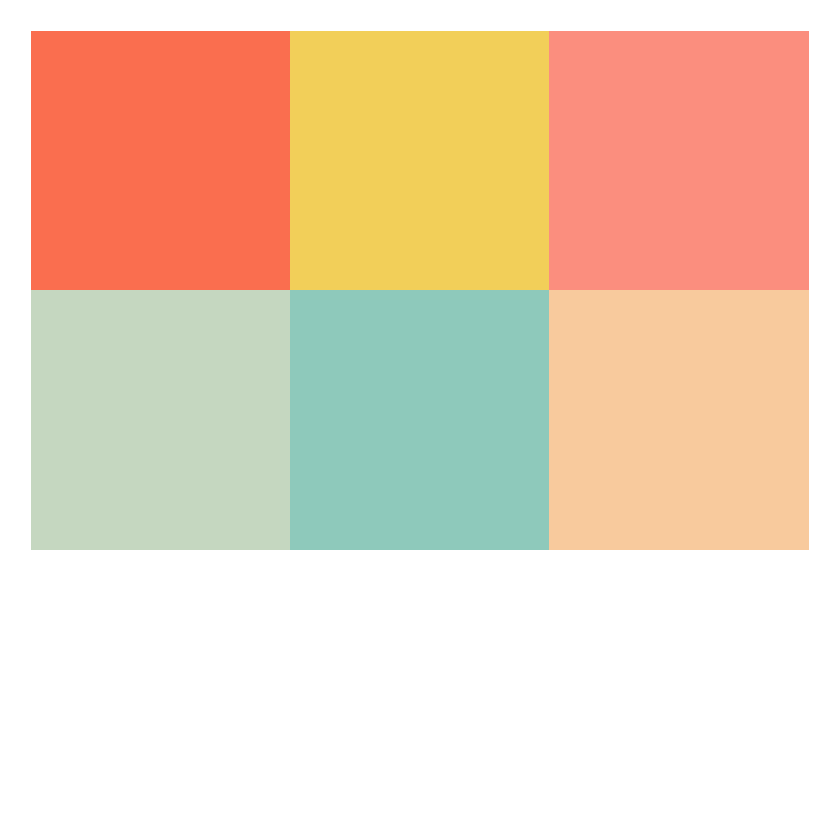

In [3]:
# Predefined personal color schemes (change them at your convenience)
colorsReBu <- c("#922B21", "#EE865D", "#DDCD5E", "#59BEC4", "#048B9F", "#114676")
colorsPuYe <- c("#5C374C", "#985277", "#CE6A85", "#FFCF6A", "#FFB742", "#E9692C")
colorsEarth <- c("#DA4511", "#FFBD00", "#6A953F", "#9A6233", "#D3AE7C", "#307CA1")
colorsRainbow <- c("#FF8EC8", "#FFDF51", "#46DBDF", "#FF8F46", "#42BAB7", "#DB0000")
colorsPastels <- c("#FA6E4F", "#F2CF59", "#FB8E7E", "#C5D7C0", "#8EC9BB", "#F8CA9D")

show_col(colorsReBu, labels = F, borders = NA)
show_col(colorsPuYe, labels = F, borders = NA)
show_col(colorsEarth, labels = F, borders = NA)
show_col(colorsRainbow, labels = F, borders = NA)
show_col(colorsPastels, labels = F, borders = NA)

# Importing the data
avocado <- read.csv("../input/avocado-prices/avocado.csv")
pokemon <- read.csv("../input/pokemon/Pokemon.csv")

# 1.1 Themes

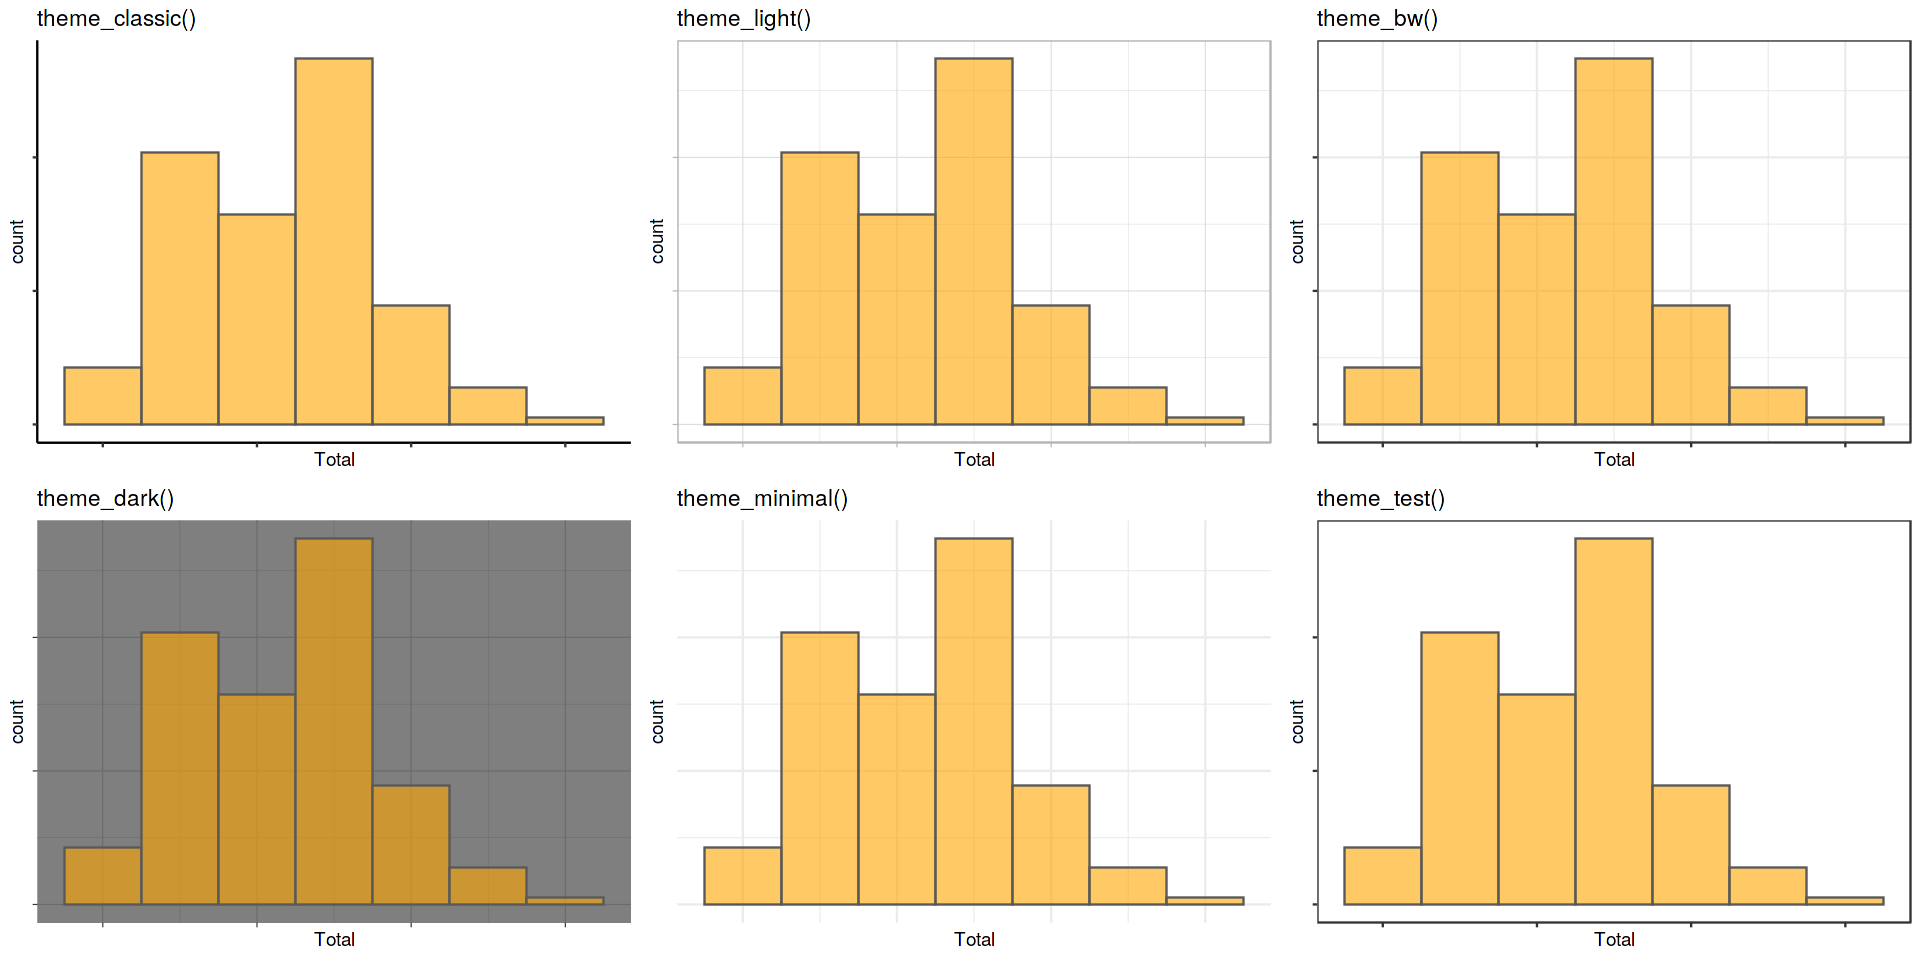

In [4]:
p1 <- pokemon %>% 
  ggplot(aes(x = Total)) +
  geom_histogram(bins = 7, fill = "orange", alpha = 0.6, color = "grey35") +
  theme_classic() +
  theme(axis.text = element_blank()) +
  labs(title = "theme_classic()")

p2 <- pokemon %>% 
  ggplot(aes(x = Total)) +
  geom_histogram(bins = 7, fill = "orange", alpha = 0.6, color = "grey35") +
  theme_light() +
  theme(axis.text = element_blank()) +
  labs(title = "theme_light()")

p3 <- pokemon %>% 
  ggplot(aes(x = Total)) +
  geom_histogram(bins = 7, fill = "orange", alpha = 0.6, color = "grey35") +
  theme_bw() + 
  theme(axis.text = element_blank()) +
  labs(title = "theme_bw()")

p4 <- pokemon %>% 
  ggplot(aes(x = Total)) +
  geom_histogram(bins = 7, fill = "orange", alpha = 0.6, color = "grey35") +
  theme_dark() + 
  theme(axis.text = element_blank()) +
  labs(title = "theme_dark()")

p5 <- pokemon %>% 
  ggplot(aes(x = Total)) +
  geom_histogram(bins = 7, fill = "orange", alpha = 0.6, color = "grey35") +
  theme_minimal() + 
  theme(axis.text = element_blank()) +
  labs(title = "theme_minimal()")

p6 <- pokemon %>% 
  ggplot(aes(x = Total)) +
  geom_histogram(bins = 7, fill = "orange", alpha = 0.6, color = "grey35") +
  theme_test() + 
  theme(axis.text = element_blank()) +
  labs(title = "theme_test()")

options(repr.plot.width=16, repr.plot.height=8)
grid.arrange(p1, p2, p3, p4, p5, p6, ncol = 3)

In [5]:
# Save the default personal theme
my_theme <- theme(
        text = element_text(color = "grey35"),
        plot.title = element_text(size = 25, face = "bold"),
        axis.title = element_text(size = 20),
        axis.text = element_text(size = 15),
        axis.line = element_line(size = 1.2, color = "grey35"),
        legend.box.background = element_rect(color = "grey75", size = 1),
        legend.box.margin = margin(t = 5, r = 5, b = 5, l = 5),
        legend.title = element_text(face = "bold", size = 15),
        legend.text = element_text(size=13))

# 2. Scatterplot

### Point Shapes:
![img](https://i.imgur.com/osZdv6N.png)

In [6]:
pokemon %>% head(4)

X. Name                  Type.1 Type.2 Total HP Attack Defense Sp..Atk
1 1  Bulbasaur             Grass  Poison 318   45  49     49      65    
2 2  Ivysaur               Grass  Poison 405   60  62     63      80    
3 3  Venusaur              Grass  Poison 525   80  82     83     100    
4 3  VenusaurMega Venusaur Grass  Poison 625   80 100    123     122    
  Sp..Def Speed Generation Legendary
1  65     45    1          False    
2  80     60    1          False    
3 100     80    1          False    
4 120     80    1          False

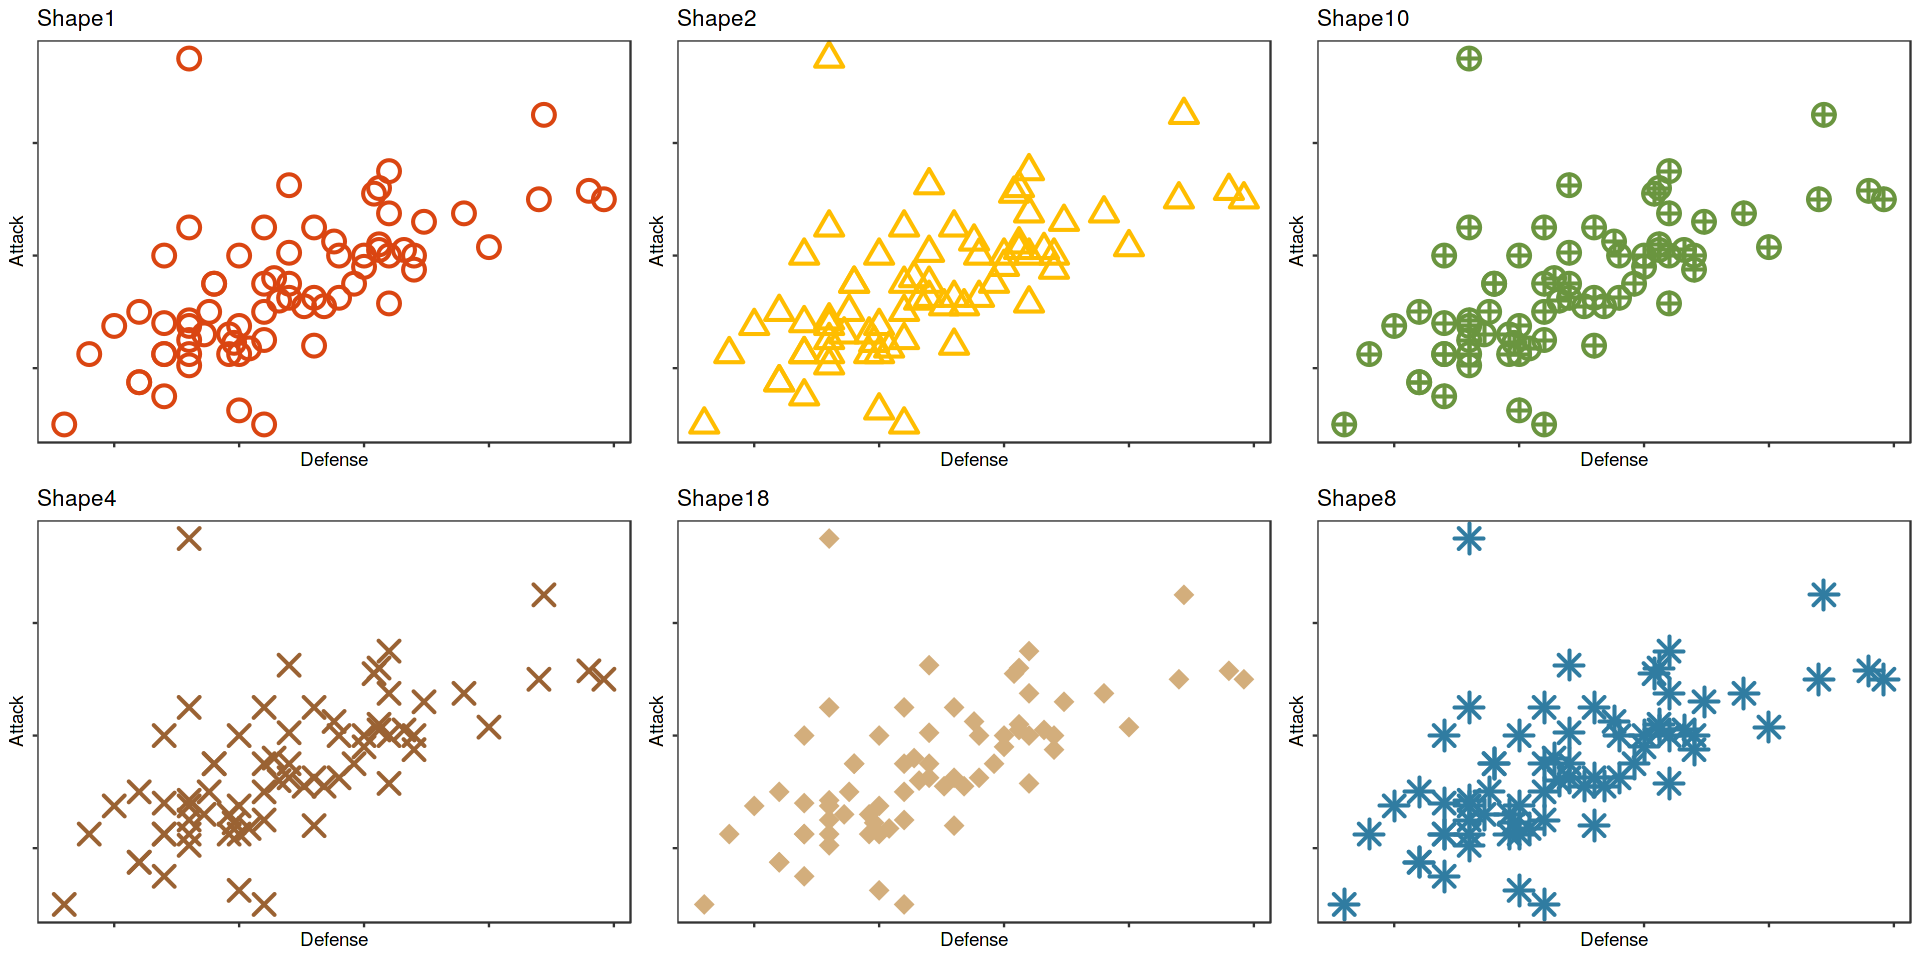

In [7]:
p1 <- pokemon %>% 
  head(70) %>% 
  ggplot(aes(x = Defense, y = Attack)) +
  geom_point(shape = 1, size = 5, stroke = 1.3, color = colorsEarth[1]) +
  theme_test() + 
  theme(axis.text = element_blank()) +
  labs(x = "Defense", y = "Attack", title = "Shape1")

p2 <- pokemon %>% 
  head(70) %>% 
  ggplot(aes(x = Defense, y = Attack)) +
  geom_point(shape = 2, size = 5, stroke = 1.3, color = colorsEarth[2]) +
  theme_test() + 
  theme(axis.text = element_blank()) +
  labs(x = "Defense", y = "Attack", title = "Shape2")

p10 <- pokemon %>% 
  head(70) %>% 
  ggplot(aes(x = Defense, y = Attack)) +
  geom_point(shape = 10, size = 5, stroke = 1.3, color = colorsEarth[3]) +
  theme_test() + 
  theme(axis.text = element_blank()) +
  labs(x = "Defense", y = "Attack", title = "Shape10")

p4 <- pokemon %>% 
  head(70) %>% 
  ggplot(aes(x = Defense, y = Attack)) +
  geom_point(shape = 4, size = 5, stroke = 1.3, color = colorsEarth[4]) +
  theme_test() + 
  theme(axis.text = element_blank()) +
  labs(x = "Defense", y = "Attack", title = "Shape4")

p18 <- pokemon %>% 
  head(70) %>% 
  ggplot(aes(x = Defense, y = Attack)) +
  geom_point(shape = 18, size = 5, stroke = 1.3, color = colorsEarth[5]) +
  theme_test() + 
  theme(axis.text = element_blank()) +
  labs(x = "Defense", y = "Attack", title = "Shape18")

p8 <- pokemon %>% 
  head(70) %>% 
  ggplot(aes(x = Defense, y = Attack)) +
  geom_point(shape = 8, size = 5, stroke = 1.3, color = colorsEarth[6]) +
  theme_test() + 
  theme(axis.text = element_blank()) +
  labs(x = "Defense", y = "Attack", title = "Shape8")

options(repr.plot.width=16, repr.plot.height=8)
grid.arrange(p1, p2, p10, p4, p18, p8, ncol = 3)

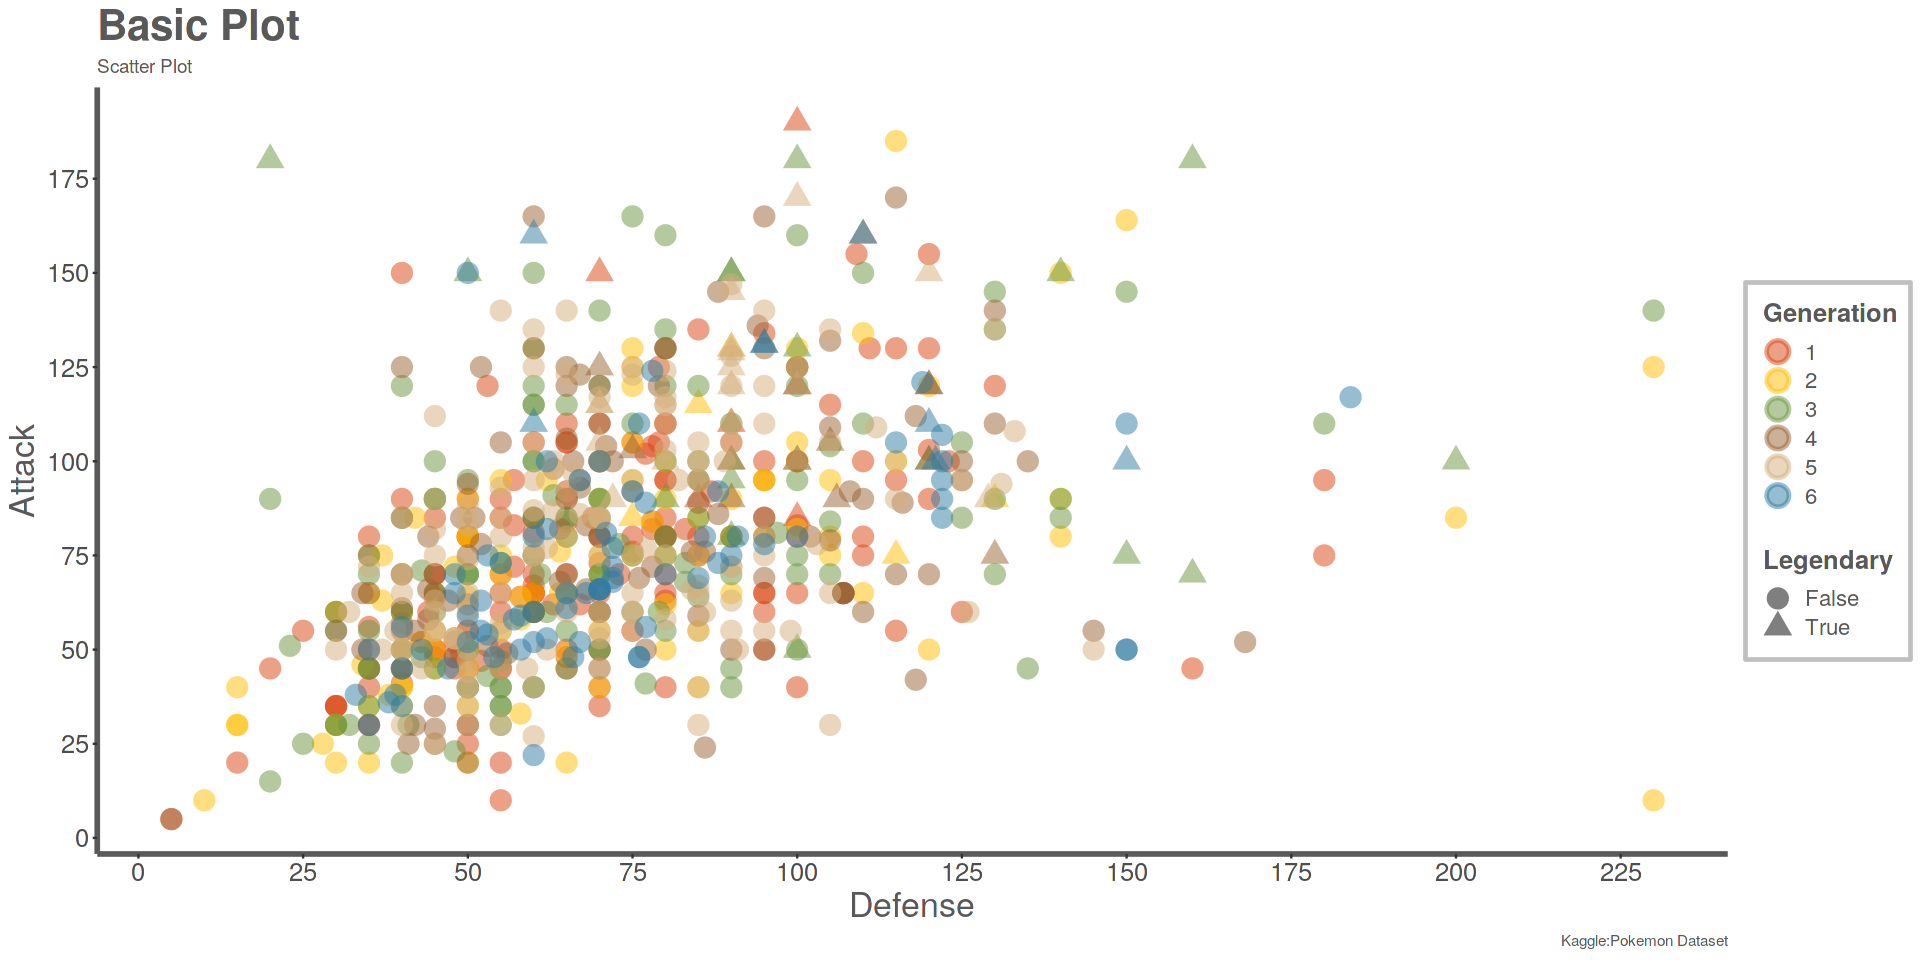

In [8]:
options(repr.plot.width=16, repr.plot.height=8)

pokemon %>% 
  ggplot(aes(x =Defense, y = Attack)) +

  geom_point(aes(color = as.factor(Generation), shape = Legendary), size = 5, stroke = 1.5, alpha = 0.5) +
  theme_classic() +
  labs(x = "Defense", y = "Attack", title = "Basic Plot", color = "Generation", shape = "Legendary",
       subtitle = "Scatter Plot", caption = "Kaggle:Pokemon Dataset") +

  my_theme +
  scale_color_manual(values = colorsEarth) +

  scale_x_continuous(breaks = seq(0, 250, 25)) +
  scale_y_continuous(breaks = seq(0, 200, 25))

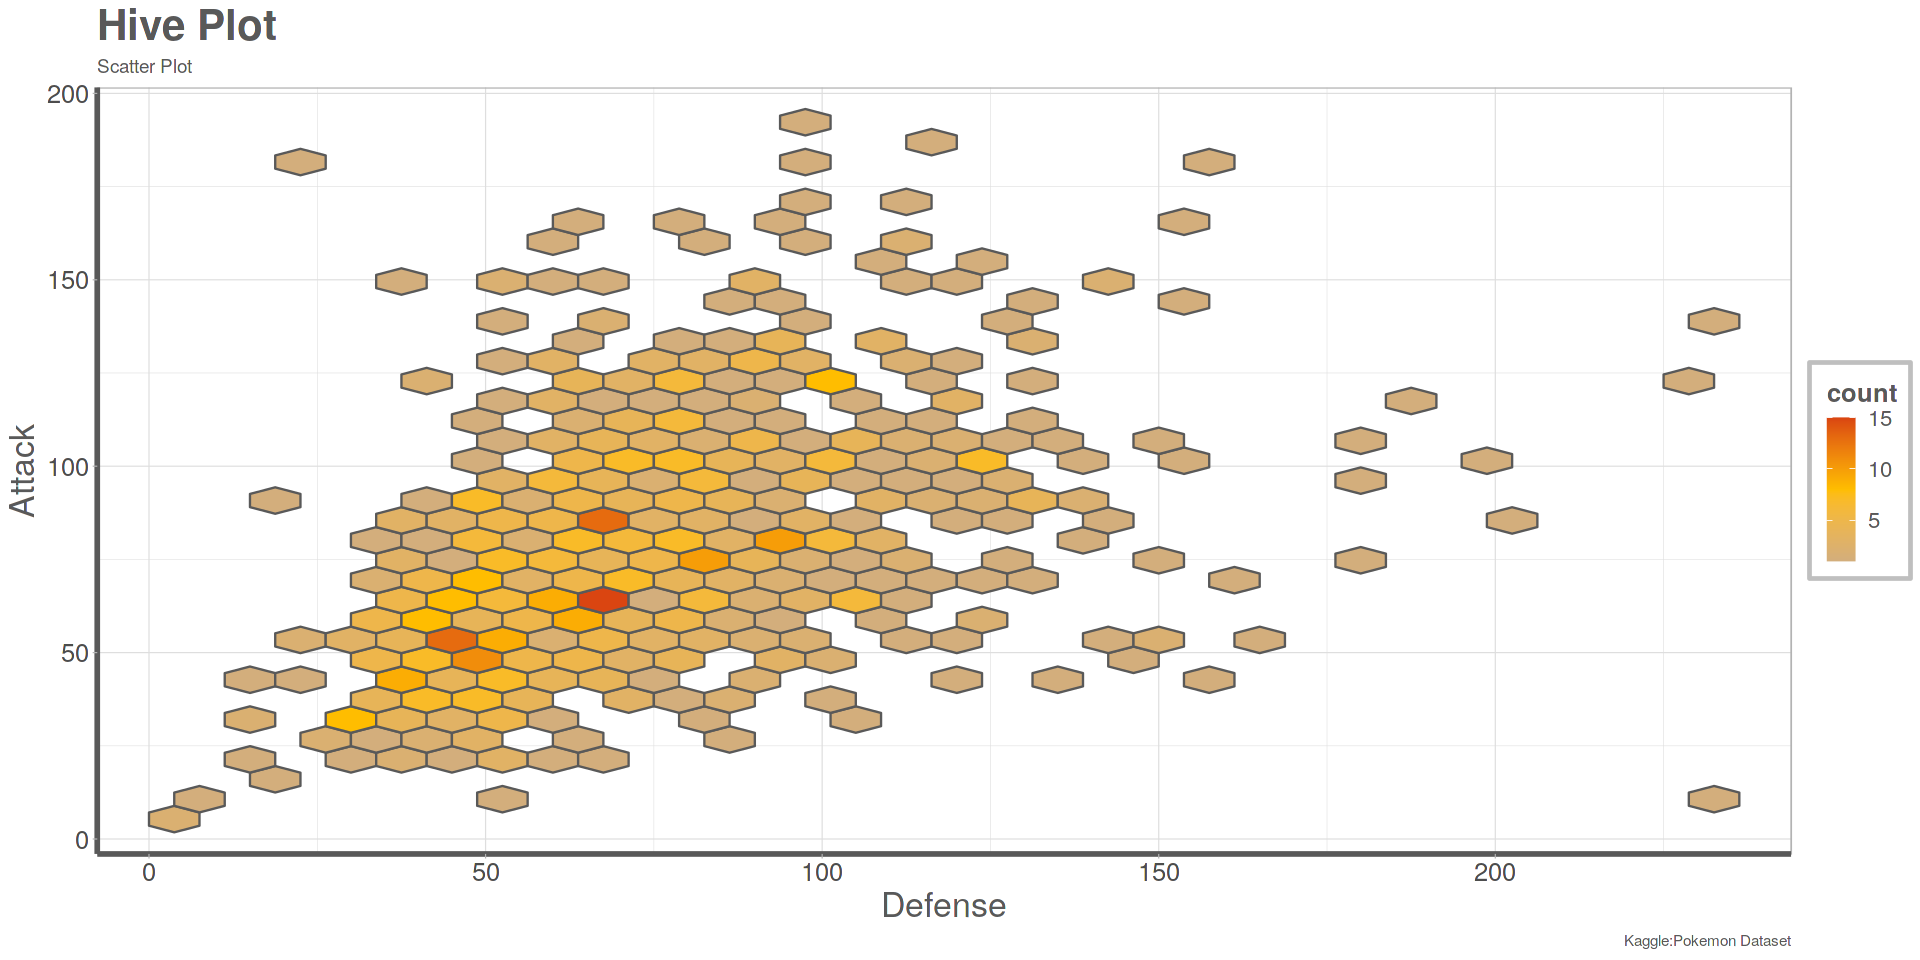

In [9]:
options(repr.plot.width=16, repr.plot.height=8)

pokemon %>% 
  ggplot(aes(x = Defense, y = Attack)) +
  
  geom_hex(bins = 30, color = "grey35") +
  theme_light() +
  labs(x = "Defense", y = "Attack", title = "Hive Plot",
       subtitle = "Scatter Plot", caption = "Kaggle:Pokemon Dataset") +
  my_theme +
  scale_fill_gradient2(low = colorsEarth[5], mid = colorsEarth[2], high = colorsEarth[1],
                        midpoint = 8)

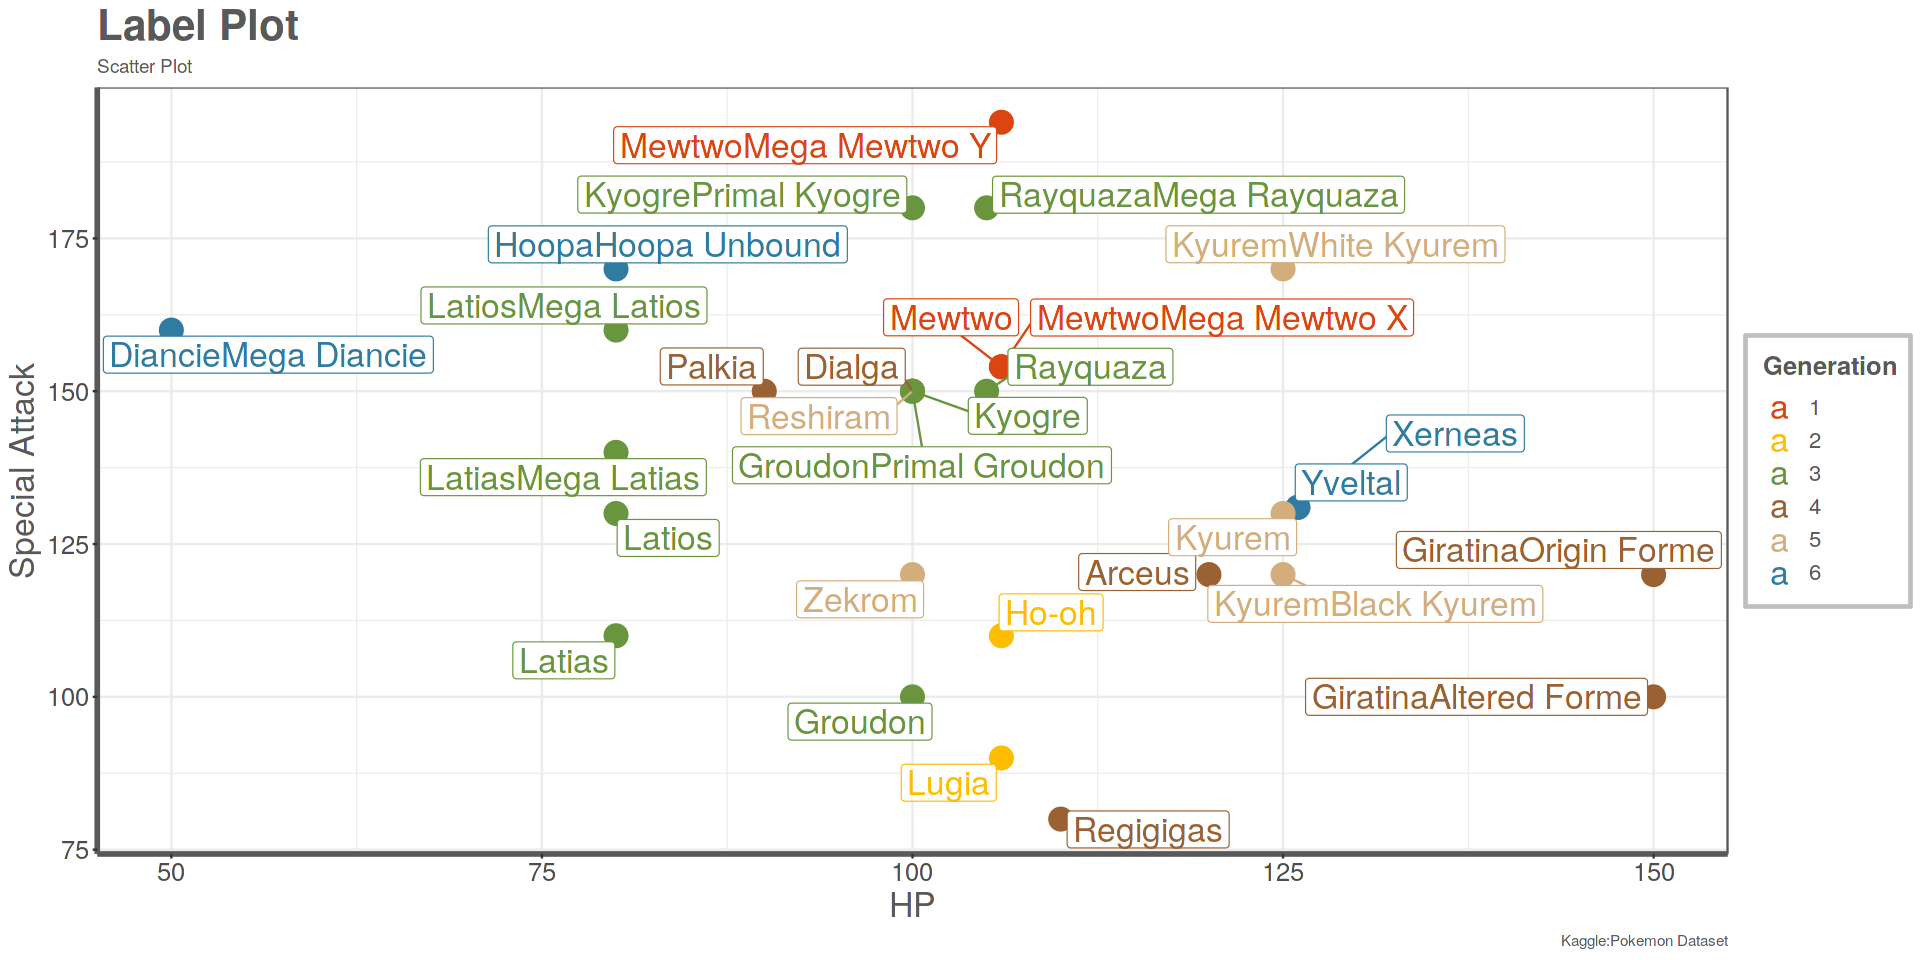

In [10]:
options(repr.plot.width=16, repr.plot.height=8)

pokemon %>% 
  filter(Legendary == "True") %>% 
  arrange(desc(Total)) %>% 
  head(30) %>% 
  mutate(Generation = as.factor(Generation)) %>% 
  
  ggplot(aes(x = HP, y = Sp..Atk)) +
  geom_point(aes(color = Generation), size = 6) +
  theme_bw() +
  labs(x = "HP", y = "Special Attack", title = "Label Plot", color = "Generation",
       subtitle = "Scatter Plot", caption = "Kaggle:Pokemon Dataset") +
  my_theme +
  theme(panel.border = element_rect(color = "grey35")) +
  geom_label_repel(aes(label = Name, color = Generation), size = 7) +
  scale_color_manual(values = colorsEarth)

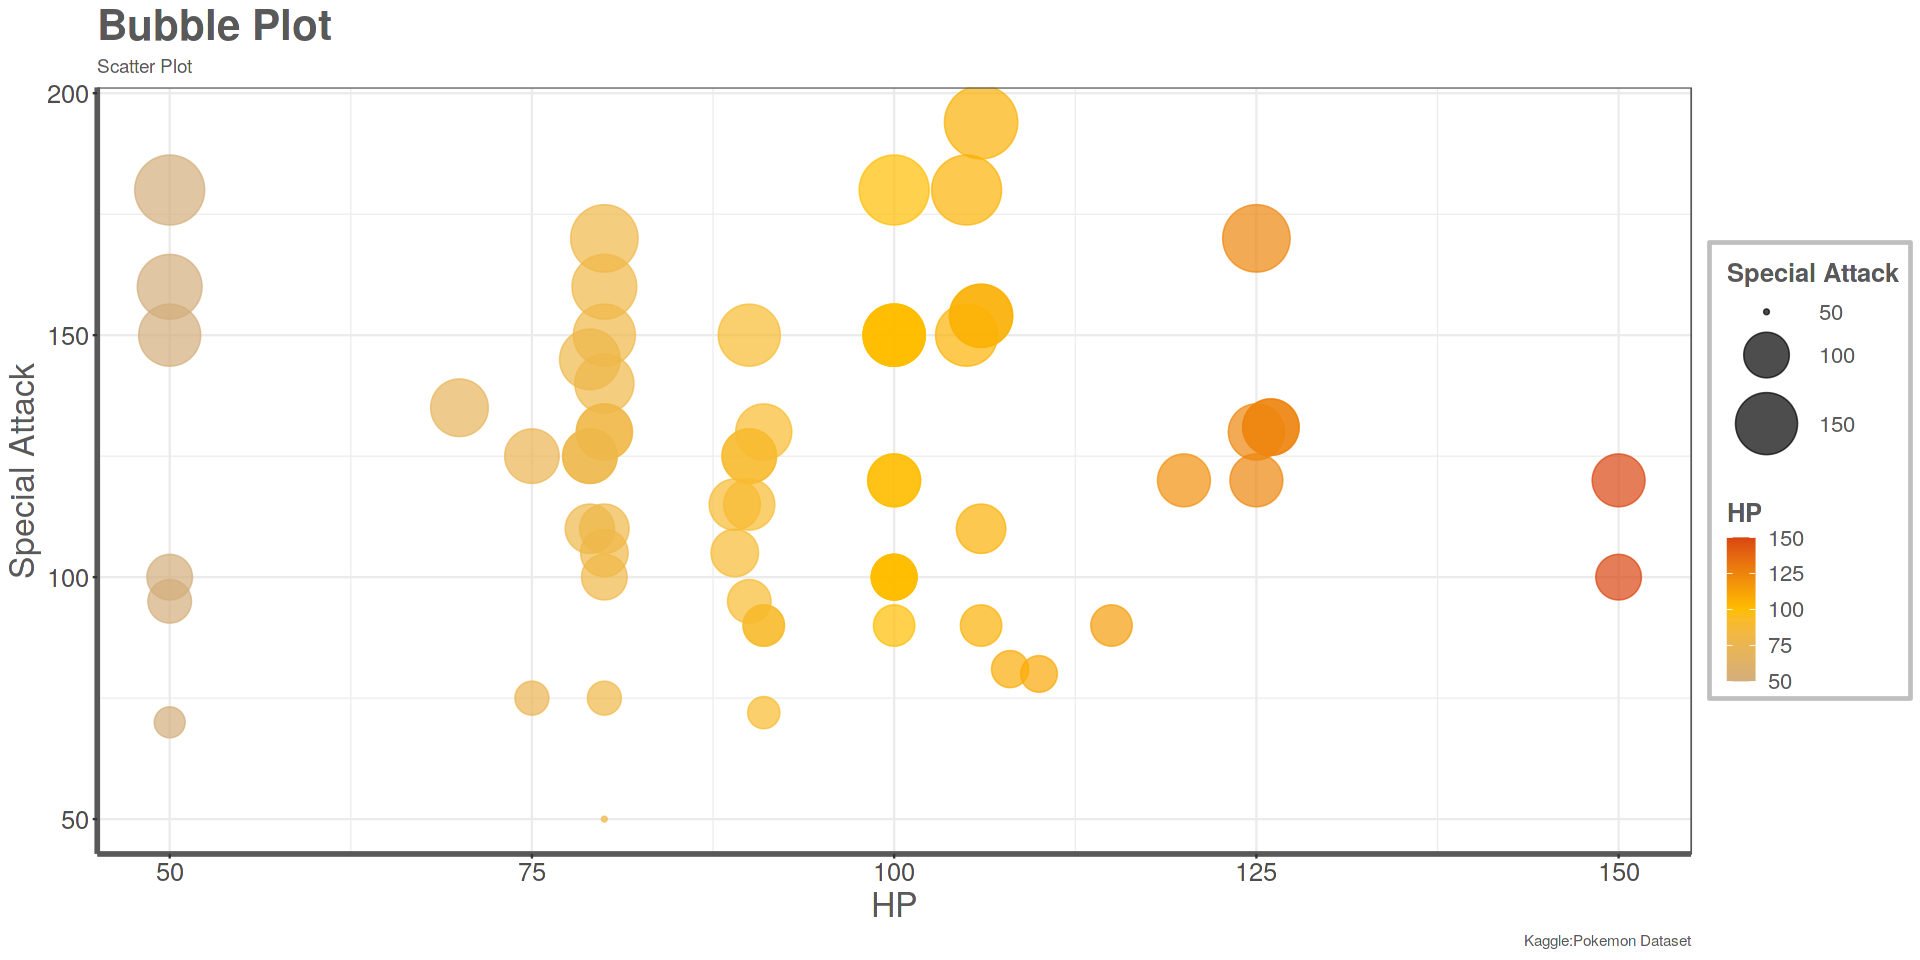

In [11]:
options(repr.plot.width=16, repr.plot.height=8)

pokemon %>% 
  filter(Legendary == "True") %>% 
  arrange(desc(Total)) %>% 
  head(150) %>%
  
  ggplot(aes(x = HP, y = Sp..Atk)) +
  geom_point(aes(color = HP, size = Sp..Atk), alpha = 0.7) +
  scale_size(range = c(1, 20)) +
  theme_bw() +
  labs(x = "HP", y = "Special Attack", title = "Bubble Plot", color = "HP", size = "Special Attack",
       subtitle = "Scatter Plot", caption = "Kaggle:Pokemon Dataset") +
  my_theme +
  theme(panel.border = element_rect(color = "grey35")) +
  scale_color_gradient2(low = colorsEarth[5], mid = colorsEarth[2], high = colorsEarth[1],
                        midpoint = 100)

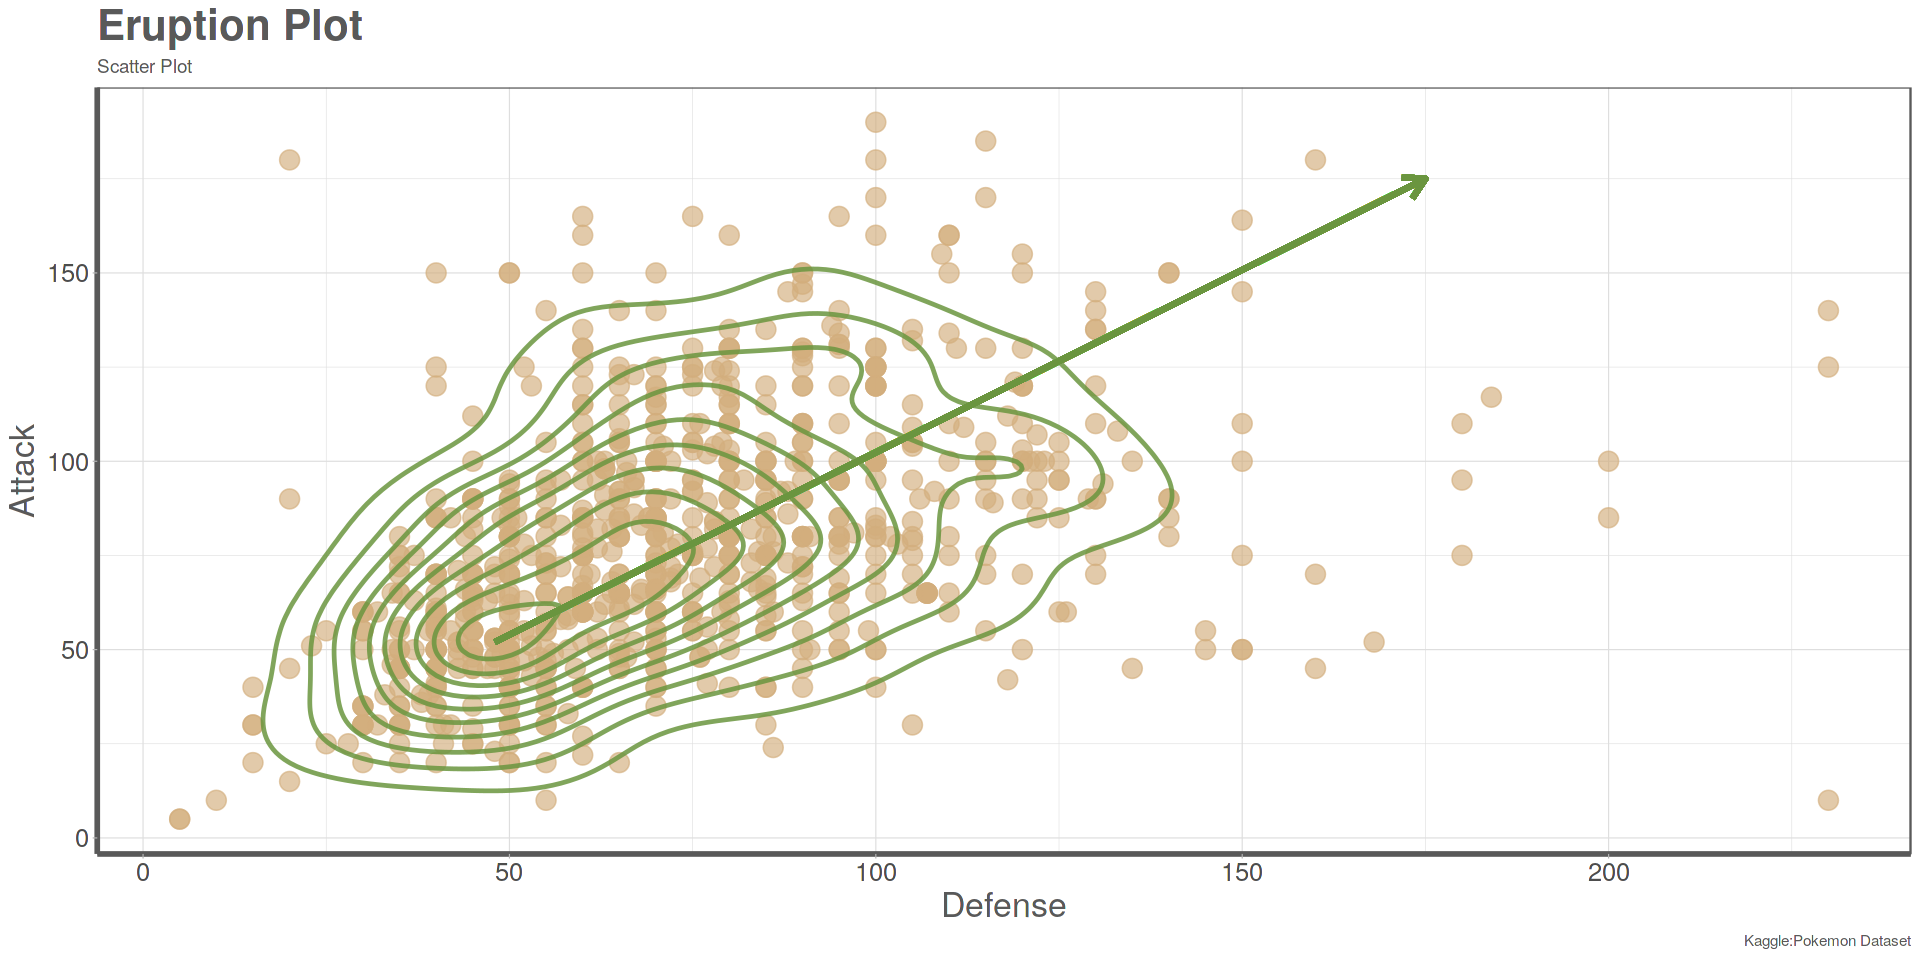

In [12]:
options(repr.plot.width=16, repr.plot.height=8)

pokemon %>% 
  ggplot(aes(x = Defense, y = Attack)) + 
  geom_point(alpha = 0.65, size = 5, color = colorsEarth[5]) +
  geom_density2d(lineend = "round", linejoin = "round", n = 200, size = 1, color = colorsEarth[3], alpha = 0.85) +
  
  theme_light() +
  labs(x = "Defense", y = "Attack", title = "Eruption Plot",
       subtitle = "Scatter Plot", caption = "Kaggle:Pokemon Dataset") +
  my_theme +
  theme(panel.border = element_rect(color = "grey35")) +
  geom_segment(aes(x = 48, y = 52, xend = 175, yend = 175), color = colorsEarth[3], size = 1.3,
               arrow = arrow(length = unit(0.5, "cm")))

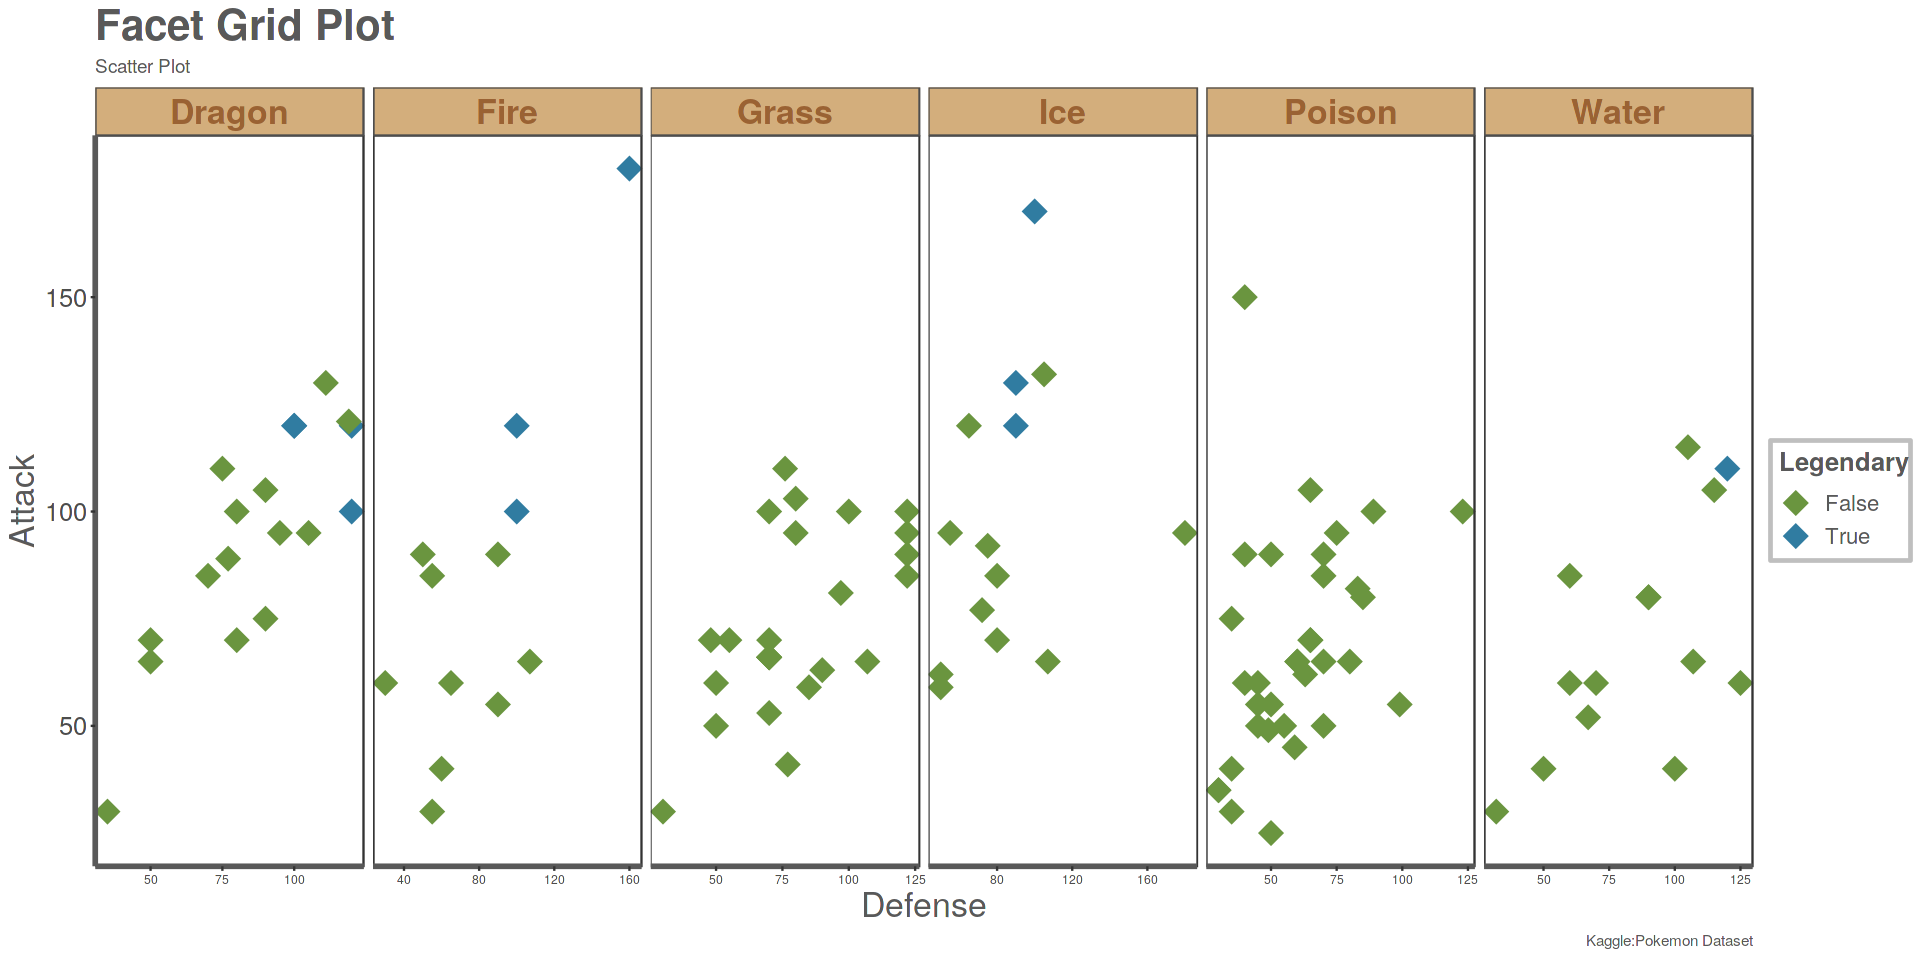

In [13]:
options(repr.plot.width=16, repr.plot.height=8)

pokemon %>% 
  filter(Type.2 %in% c("Poison", "Dragon", "Water", "Grass", "Fire", "Ice")) %>% 
  
  ggplot(aes(x = Defense, y = Attack)) + 
  geom_point(aes(color = Legendary), size = 7, shape = 18) +
  facet_grid(~ Type.2, scales = "free") +
  theme_test() +
  labs(x = "Defense", y = "Attack", title = "Facet Grid Plot",
       subtitle = "Scatter Plot", caption = "Kaggle:Pokemon Dataset") +
  my_theme +
  theme(axis.text.x = element_text(size = 7),
        strip.background = element_rect(colour = "grey30", fill = colorsEarth[5]),
        strip.text.x = element_text(colour = colorsEarth[4], face = "bold"),
        strip.text = element_text(size=20)) +
  scale_color_manual(values = c(colorsEarth[3], colorsEarth[6]))

# 3. Lineplots

### Linetypes in GGplot:
![img](https://i.imgur.com/c7IGmxR.png)

In [14]:
# Transform "Date" column from factor to date type
avocado <- avocado %>%
  mutate(Date = as.Date(Date, format = "%Y-%m-%d"))

averaged_avocado <- avocado %>%
  group_by(Date, region, type) %>% 
  summarise(AveragePrice = mean(AveragePrice),
            Total.Volume = mean(Total.Volume),
            Total.Bags = mean(Total.Bags))

averaged_avocado %>% head(4)

Date       region  type         AveragePrice Total.Volume Total.Bags
1 2015-01-04 Albany  conventional 1.22          40873.28     9716.46  
2 2015-01-04 Albany  organic      1.79           1373.95     1162.65  
3 2015-01-04 Atlanta conventional 1.00         435021.49    46815.79  
4 2015-01-04 Atlanta organic      1.76           3846.69     1408.19

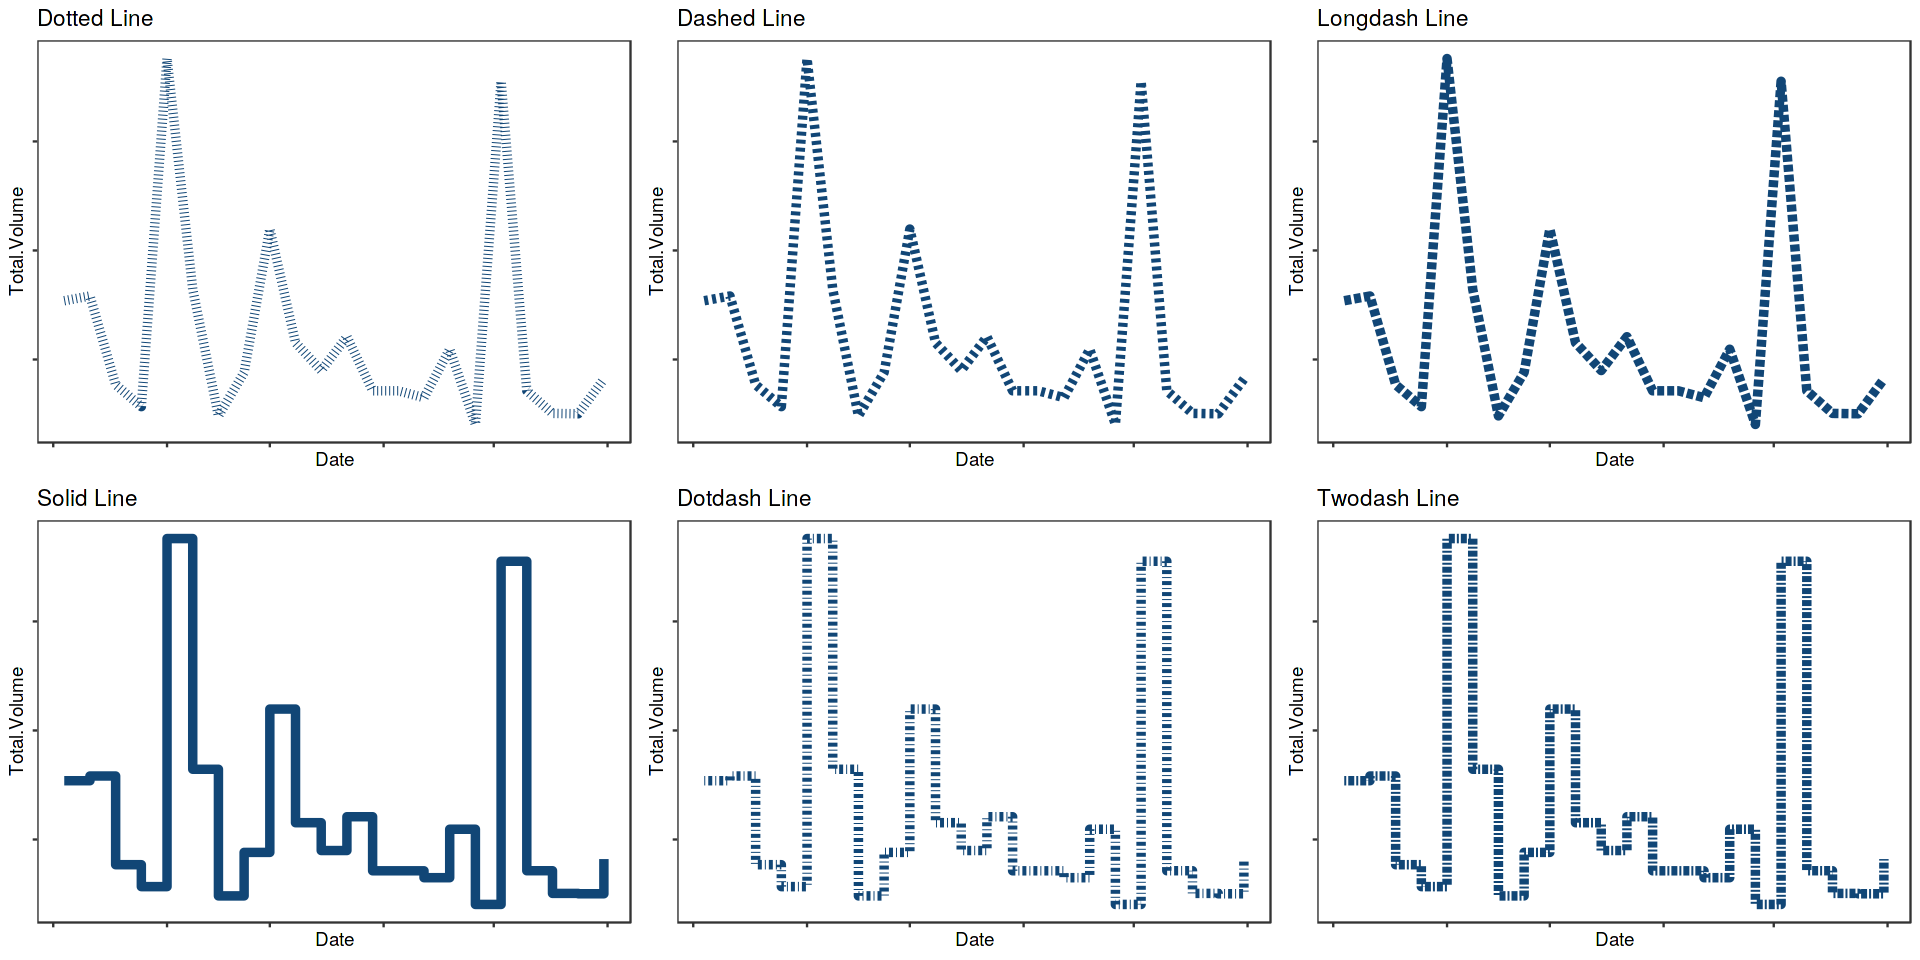

In [15]:
data <- avocado %>% 
  filter(region == "SanFrancisco" & type == "conventional" & Date >= "2015-01-01" & Date <= "2015-06-01")

p10 <- data %>%
  ggplot(aes(x = Date)) +
  geom_line(aes(y = Total.Volume), size = 2, color = colorsReBu[6], linetype = "dotted") +
  theme_test() + 
  theme(axis.text = element_blank()) + 
  labs(title = "Dotted Line")

p11 <- data %>%
  ggplot(aes(x = Date)) +
  geom_line(aes(y = Total.Volume), size = 2, color = colorsReBu[6], linetype = "dashed") +
  theme_test() + 
  theme(axis.text = element_blank()) + 
  labs(title = "Dashed Line")

p12 <- data %>%
  ggplot(aes(x = Date)) +
  geom_line(aes(y = Total.Volume), size = 2, color = colorsReBu[6], linetype = "longdash") +
  theme_test() + 
  theme(axis.text = element_blank()) + 
  labs(title = "Longdash Line")

p20 <- data %>%
  ggplot(aes(x = Date)) +
  geom_step(aes(y = Total.Volume), size = 2, color = colorsReBu[6], linetype = "solid") +
  theme_test() + 
  theme(axis.text = element_blank()) + 
  labs(title = "Solid Line")

p21 <- data %>%
  ggplot(aes(x = Date)) +
  geom_step(aes(y = Total.Volume), size = 2, color = colorsReBu[6], linetype = "dotdash") +
  theme_test() + 
  theme(axis.text = element_blank()) + 
  labs(title = "Dotdash Line")

p22 <- data %>%
  ggplot(aes(x = Date)) +
  geom_step(aes(y = Total.Volume), size = 2, color = colorsReBu[6], linetype = "twodash") +
  theme_test() + 
  theme(axis.text = element_blank()) + 
  labs(title = "Twodash Line")

options(repr.plot.width=16, repr.plot.height=8)
grid.arrange(p10, p11, p12, p20, p21, p22, ncol = 3)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



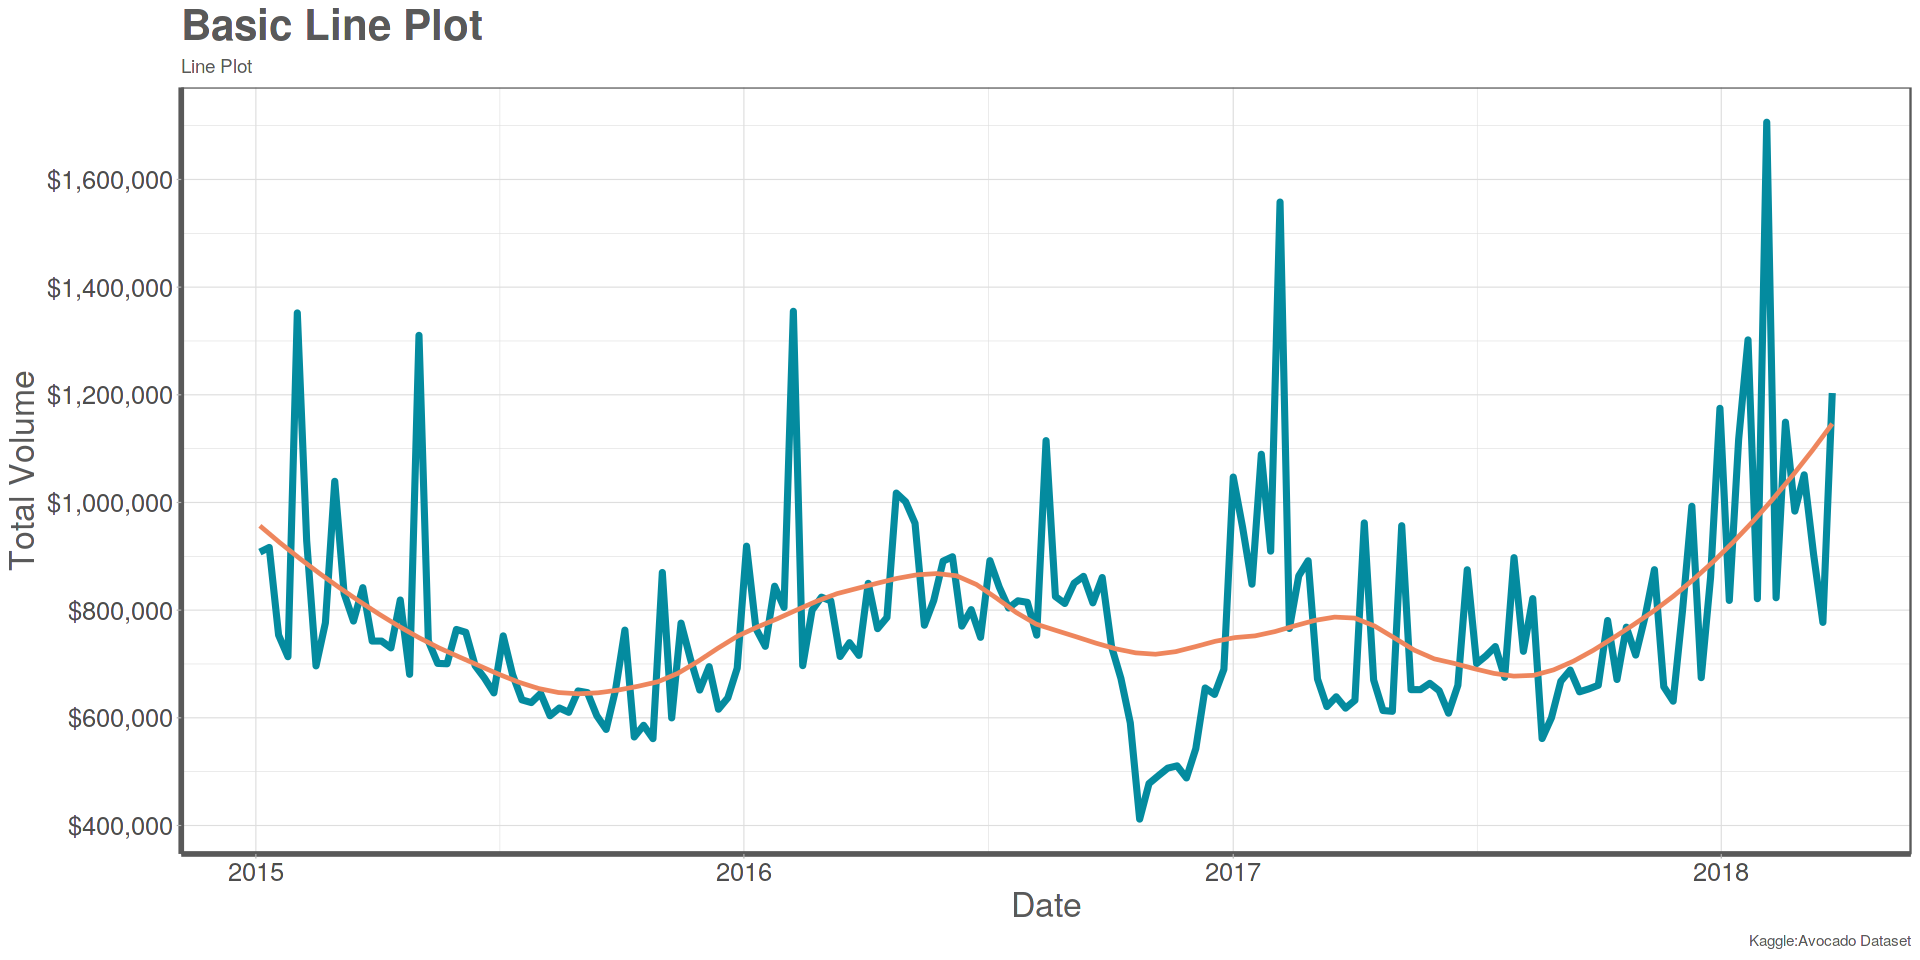

In [16]:
options(repr.plot.width=16, repr.plot.height=8)

avocado %>% 
  filter(region == "SanFrancisco" & type == "conventional") %>%
  
  ggplot(aes(x = Date)) +
  geom_line(aes(y = Total.Volume), size = 1.5, color = colorsReBu[5]) +
  labs(x = "Date", y = "Total Volume", title = "Basic Line Plot", subtitle = "Line Plot", caption = "Kaggle:Avocado Dataset") +
  theme_light() +
  my_theme +
  theme(panel.border = element_rect(color = "grey35")) +
  scale_y_continuous(breaks = seq(0, 2000000, 200000), labels = scales::dollar) +
  geom_smooth(aes(y = Total.Volume), color = colorsReBu[2], se = F, span = 0.4)

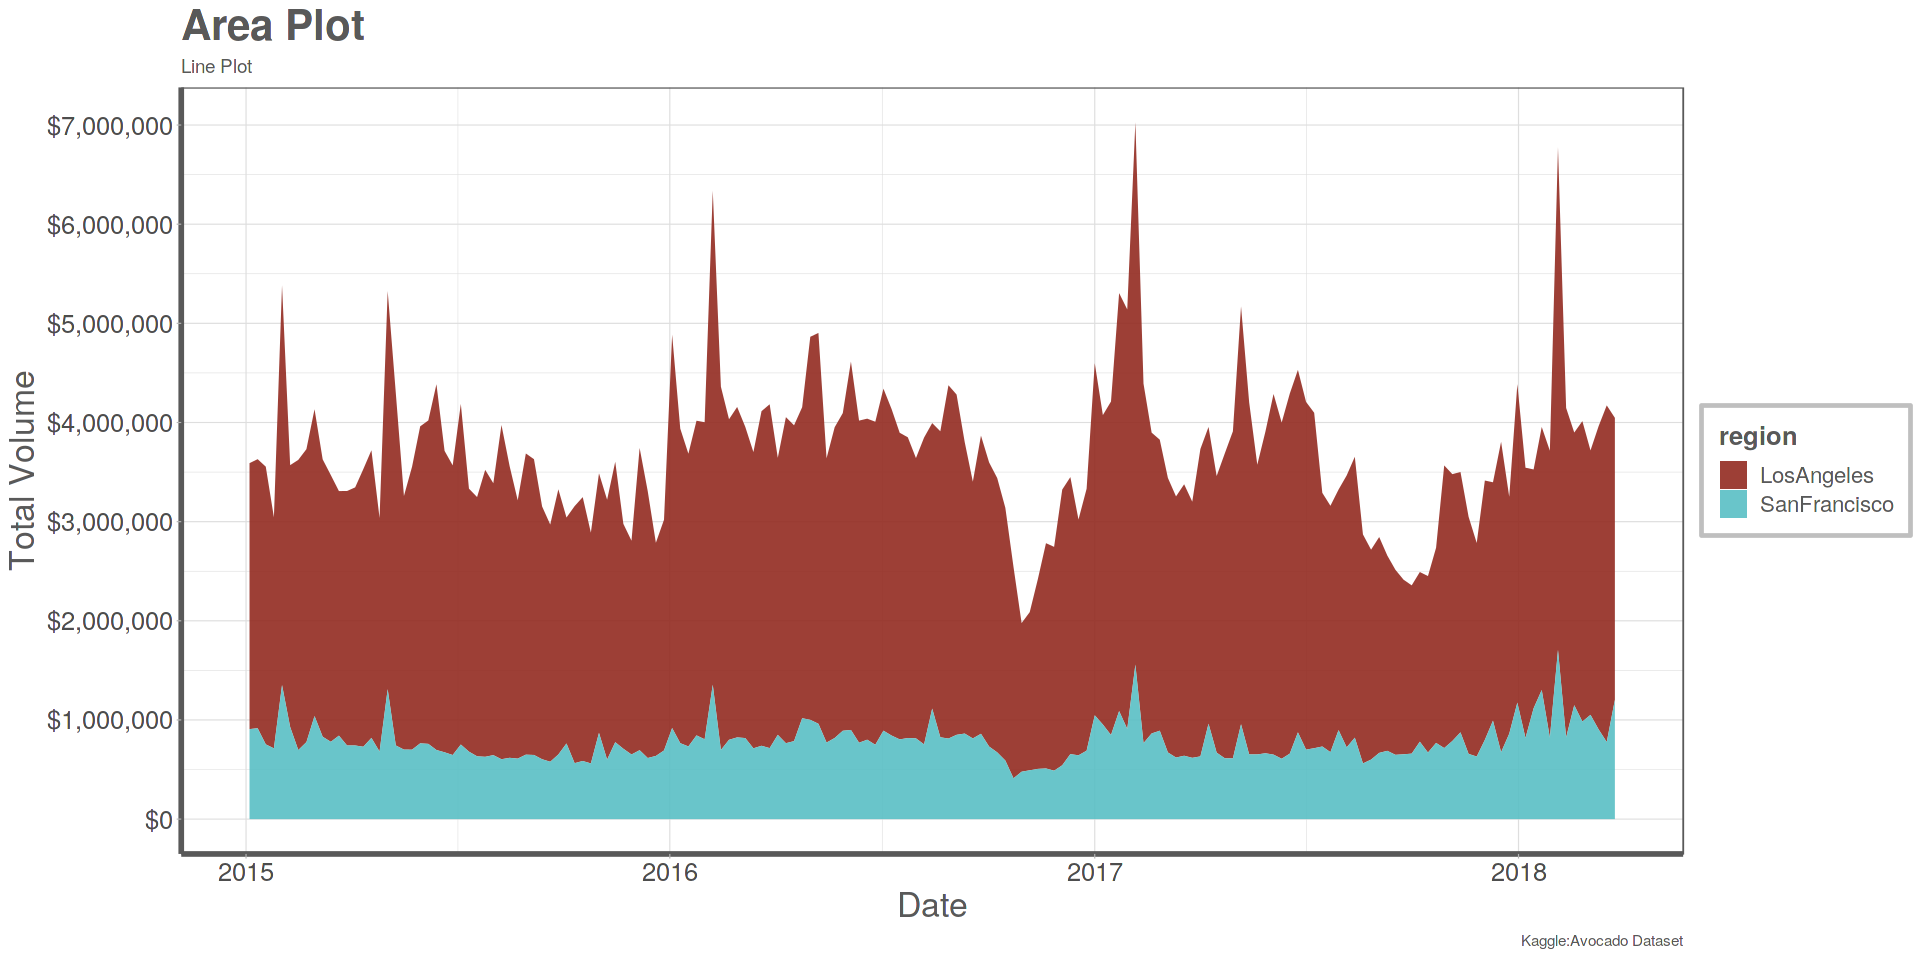

In [17]:
options(repr.plot.width=16, repr.plot.height=8)

avocado %>% 
  filter(region %in% c("SanFrancisco", "LosAngeles") & type == "conventional") %>%
  
  ggplot(aes(x = Date)) +
  geom_area(aes(y = Total.Volume, fill = region), alpha = 0.9) +
  labs(x = "Date", y = "Total Volume", title = "Area Plot", subtitle = "Line Plot", caption = "Kaggle:Avocado Dataset") +
  theme_light() +
  my_theme +
  theme(panel.border = element_rect(color = "grey35")) +
  scale_y_continuous(breaks = seq(0, 7000000, 1000000), labels = scales::dollar) +
  scale_fill_manual(values = c(colorsReBu[1], colorsReBu[4]))

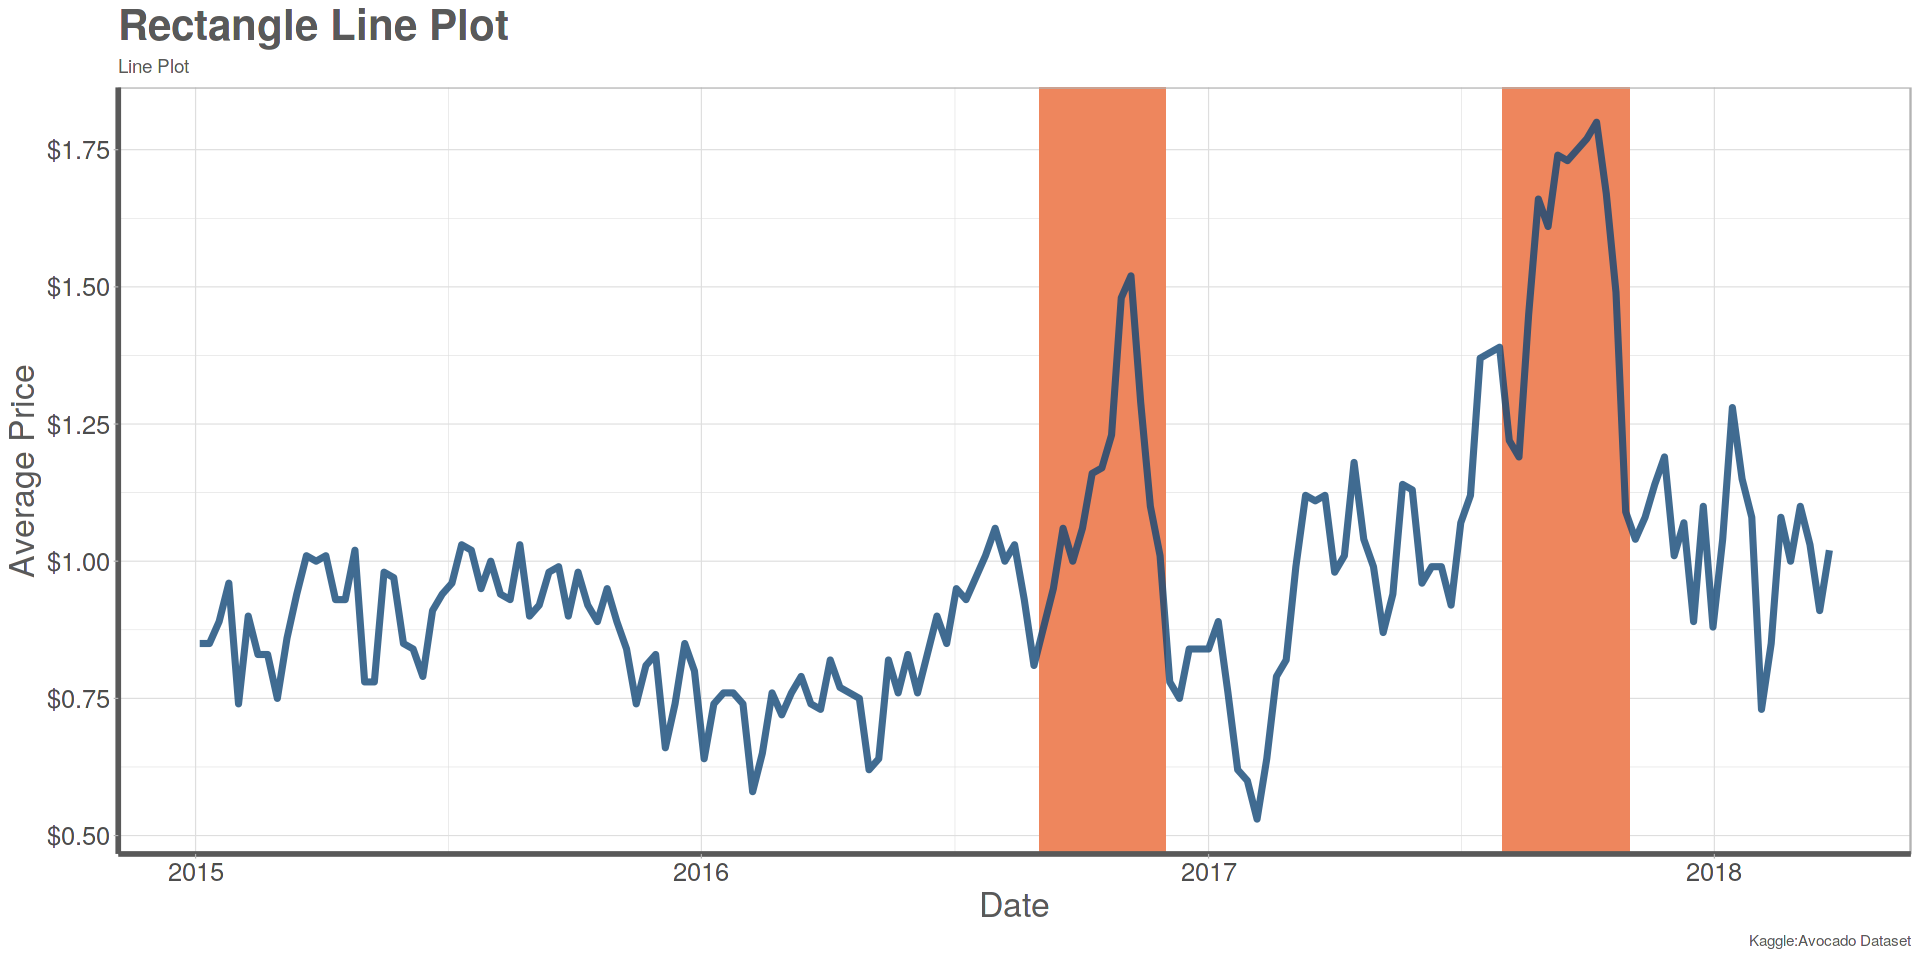

In [18]:
options(repr.plot.width=16, repr.plot.height=8)

data <- avocado %>% 
  filter(region == "LosAngeles" & type == "conventional") %>% 
  group_by(Date) %>% 
  summarise(AveragePrice = mean(AveragePrice))
  
data %>% 
  ggplot(aes(x = Date, y = AveragePrice)) +
  geom_rect(aes(xmin = as.Date('2017-08-01'), ymin = -Inf, xmax = as.Date('2017-11-01'), ymax = Inf), fill = colorsReBu[2]) +
  geom_rect(aes(xmin = as.Date('2016-09-01'), ymin = -Inf, xmax = as.Date('2016-12-01'), ymax = Inf), fill = colorsReBu[2]) +
  geom_path(size = 1.5, color = colorsReBu[6], alpha = 0.8) +
  labs(x = "Date", y = "Average Price", title = "Rectangle Line Plot", subtitle = "Line Plot", caption = "Kaggle:Avocado Dataset") +
  theme_light() +
  my_theme +
  scale_y_continuous(breaks = seq(0, 2, 0.25), labels = scales::dollar)

# 4. Barplots

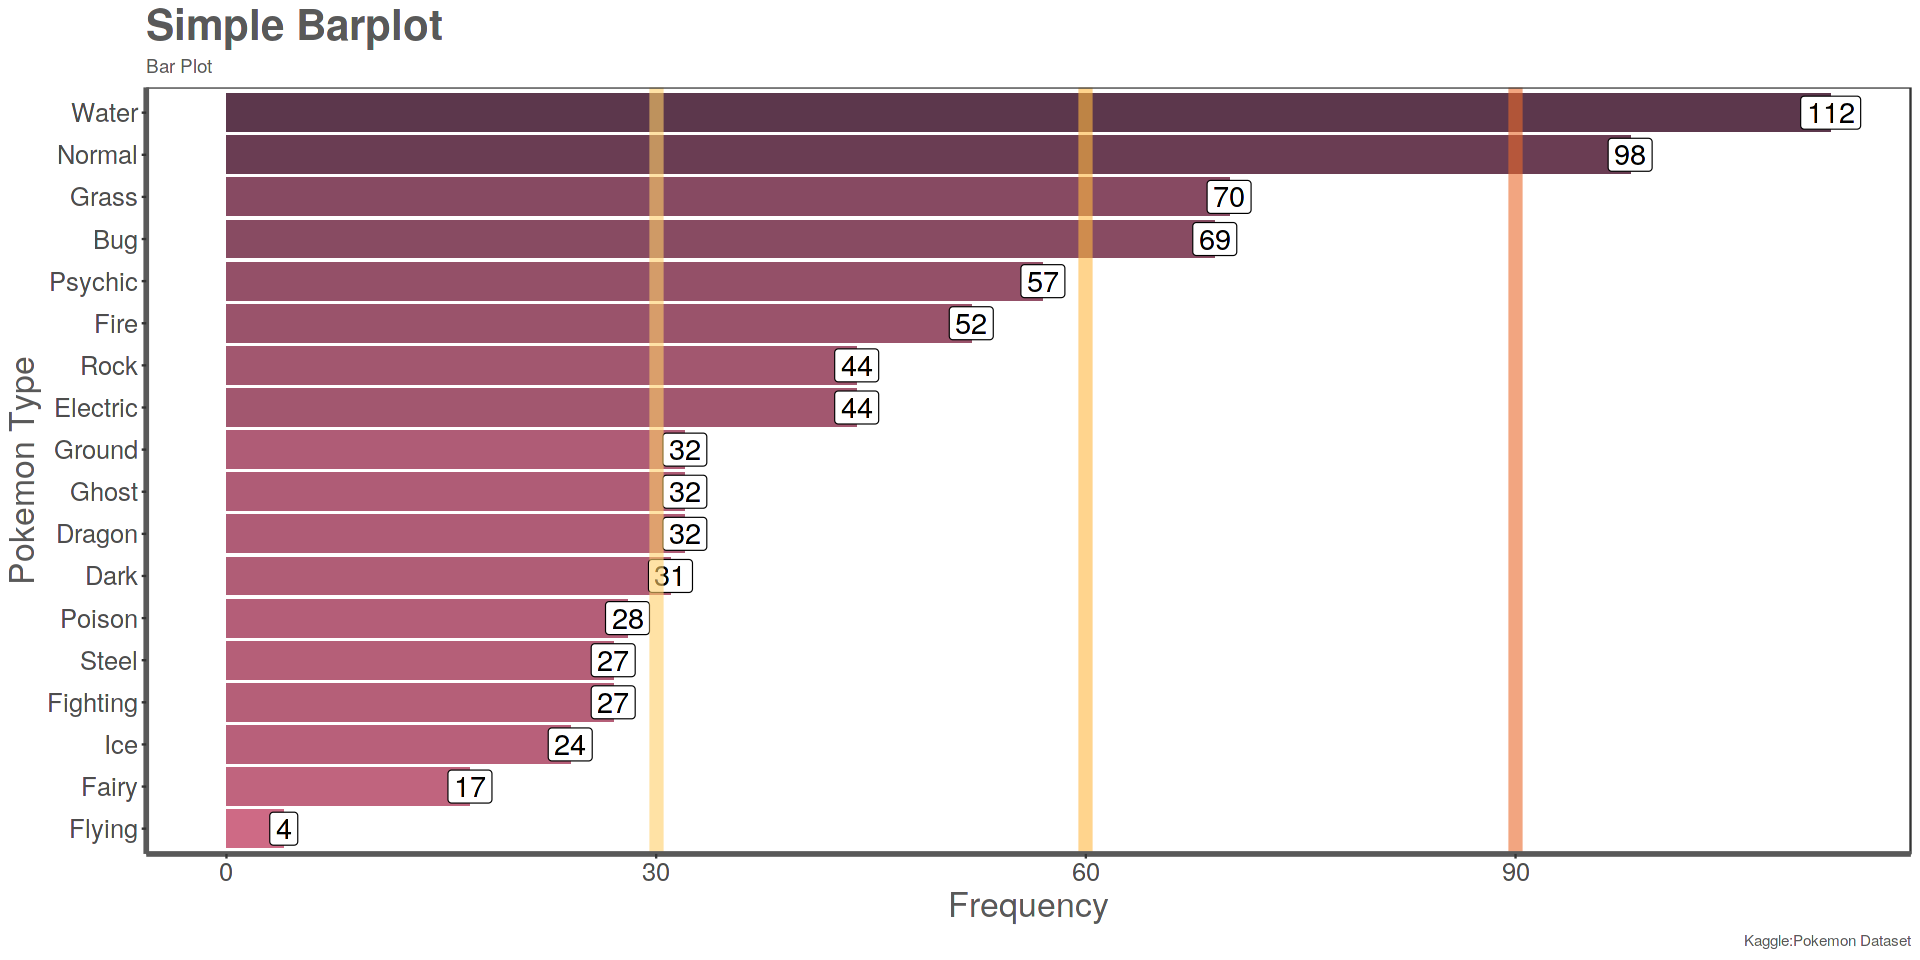

In [19]:
options(repr.plot.width=16, repr.plot.height=8)

pokemon %>% 
  group_by(Type.1) %>% 
  summarise(n = n()) %>% 
  
  ggplot(aes(x = reorder(Type.1, n), y = n)) +
  geom_bar(stat = "identity", aes(fill = n)) +
  coord_flip() +
  geom_label(aes(label = n), size = 6) +
  scale_fill_gradient(low=colorsPuYe[3], high=colorsPuYe[1], guide = "none") +
  geom_hline(yintercept = 30, color = colorsPuYe[4], alpha = 0.6, size = 3) +
  geom_hline(yintercept = 60, color = colorsPuYe[5], alpha = 0.6, size = 3) +
  geom_hline(yintercept = 90, color = colorsPuYe[6], alpha = 0.6, size = 3) +
  theme_test() + 
  my_theme +
  labs(x = "Pokemon Type", y = "Frequency", title = "Simple Barplot", subtitle = "Bar Plot", caption = "Kaggle:Pokemon Dataset")

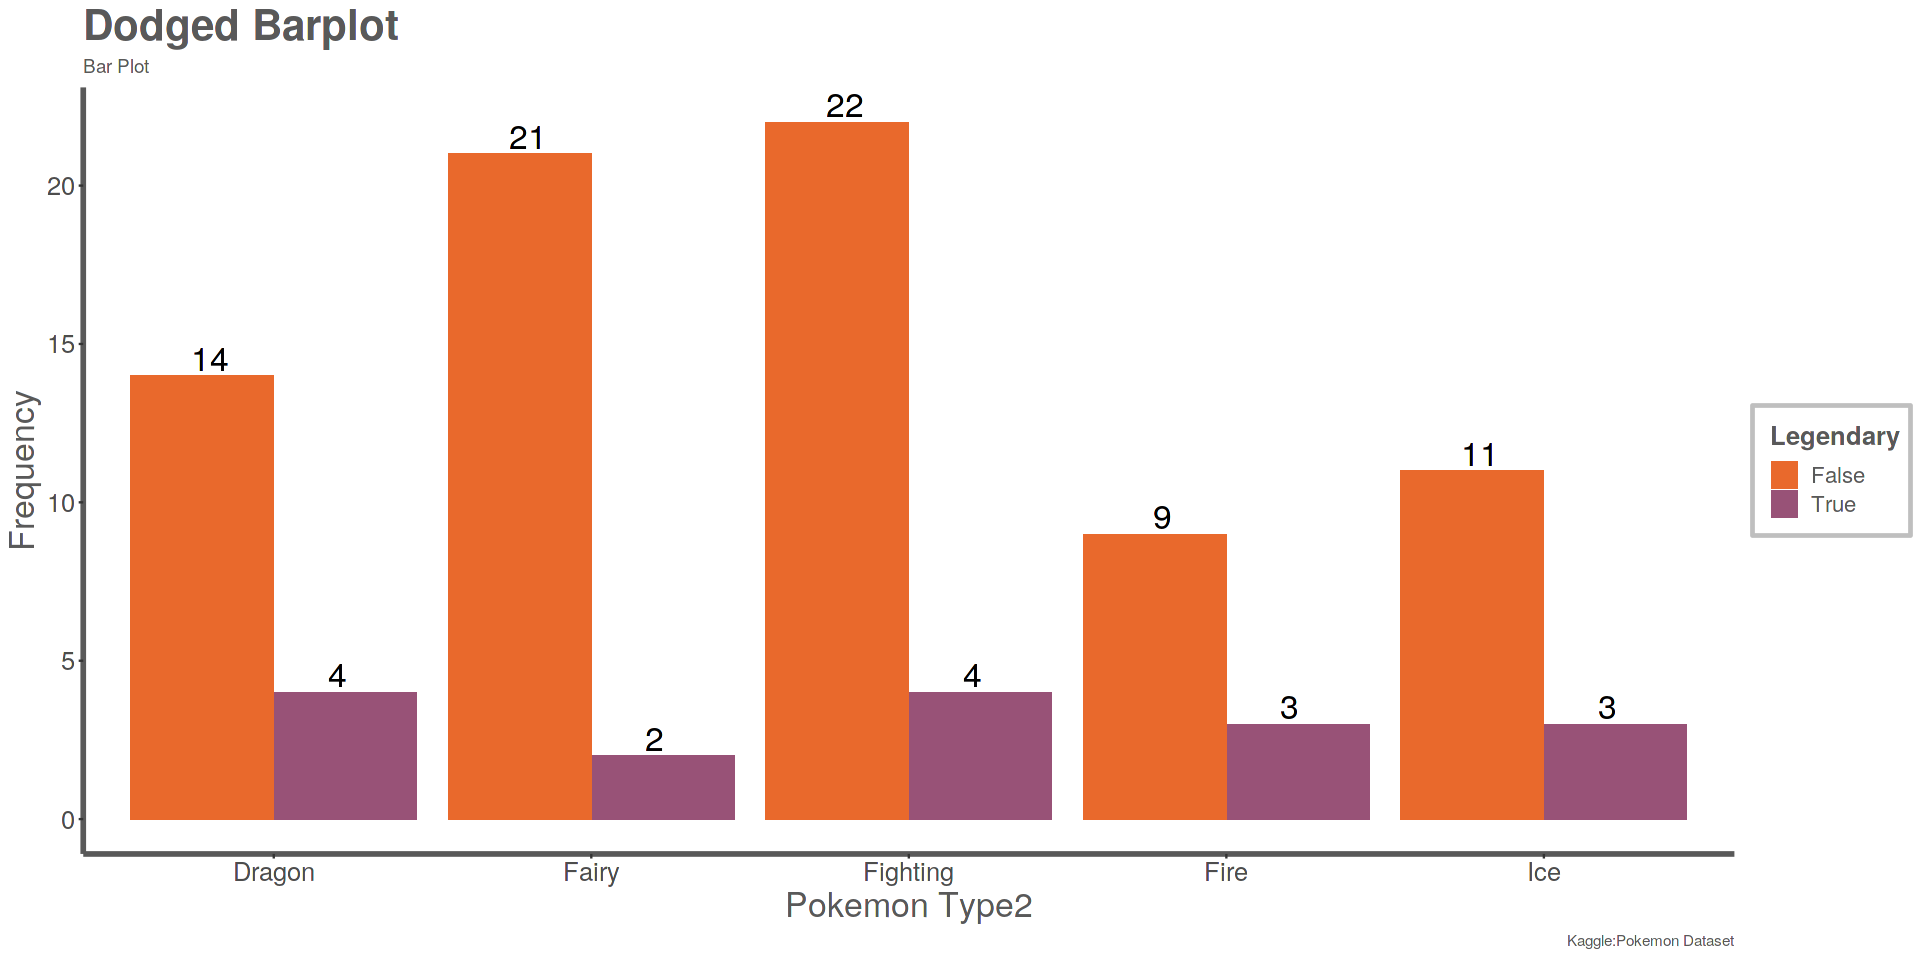

In [20]:
options(repr.plot.width=16, repr.plot.height=8)

pokemon %>%  
  filter(Type.2 %in% c("Fire", "Dragon", "Fighting", "Fairy", "Ice")) %>% 
  ggplot(aes(x = Type.2, fill = Legendary)) +
  geom_bar(stat = "count", position = "dodge") +
  geom_text(aes(label=..count..), stat="count", position=position_dodge(0.8), vjust=-0.2, size=7) +
  scale_fill_manual(values = c(colorsPuYe[6], colorsPuYe[2])) +
  theme_classic() + 
  my_theme +
  labs(x = "Pokemon Type2", y = "Frequency", title = "Dodged Barplot", subtitle = "Bar Plot", caption = "Kaggle:Pokemon Dataset")

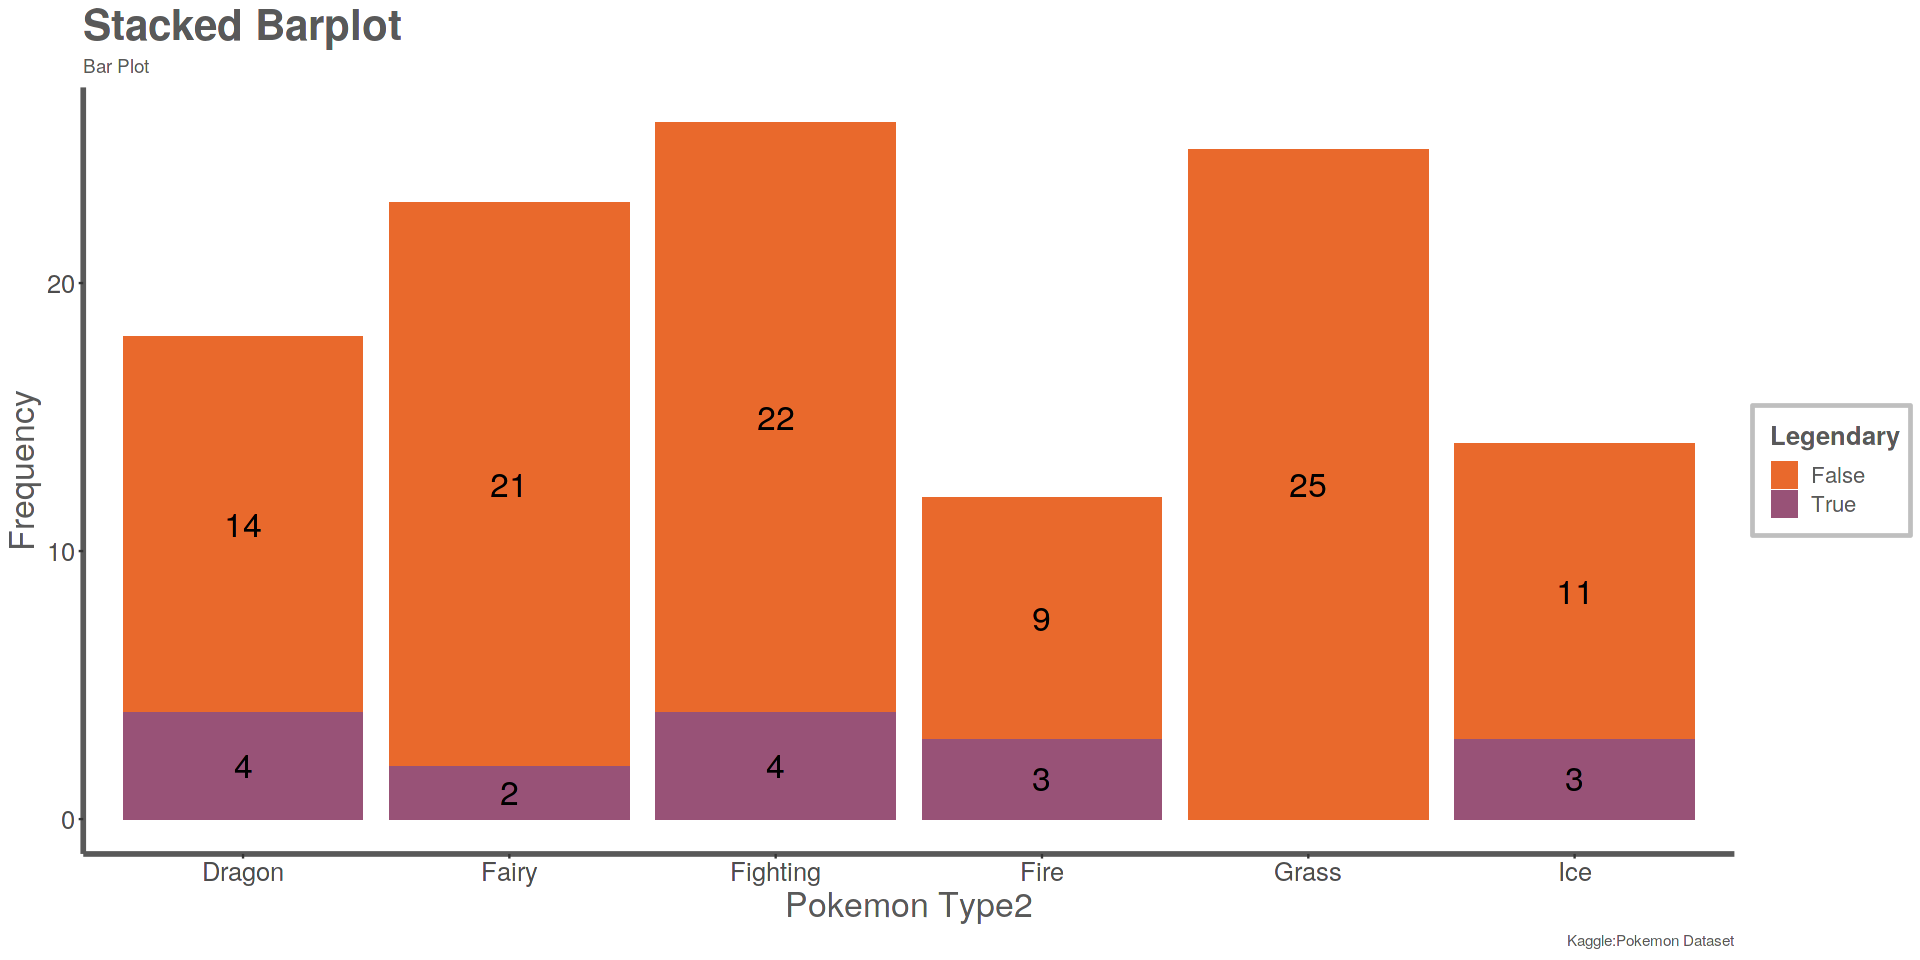

In [21]:
options(repr.plot.width=16, repr.plot.height=8)

pokemon %>%  
  filter(Type.2 %in% c("Fire", "Dragon", "Fighting", "Fairy", "Ice", "Grass")) %>% 
  ggplot(aes(x = Type.2, fill = Legendary)) +
  geom_bar(stat = "count", position = "stack") +
  geom_text(aes(label=..count..), stat="count", position=position_stack(0.5), size=7) +
  scale_fill_manual(values = c(colorsPuYe[6], colorsPuYe[2])) +
  theme_classic() + 
  my_theme +
  labs(x = "Pokemon Type2", y = "Frequency", title = "Stacked Barplot", subtitle = "Bar Plot", caption = "Kaggle:Pokemon Dataset")

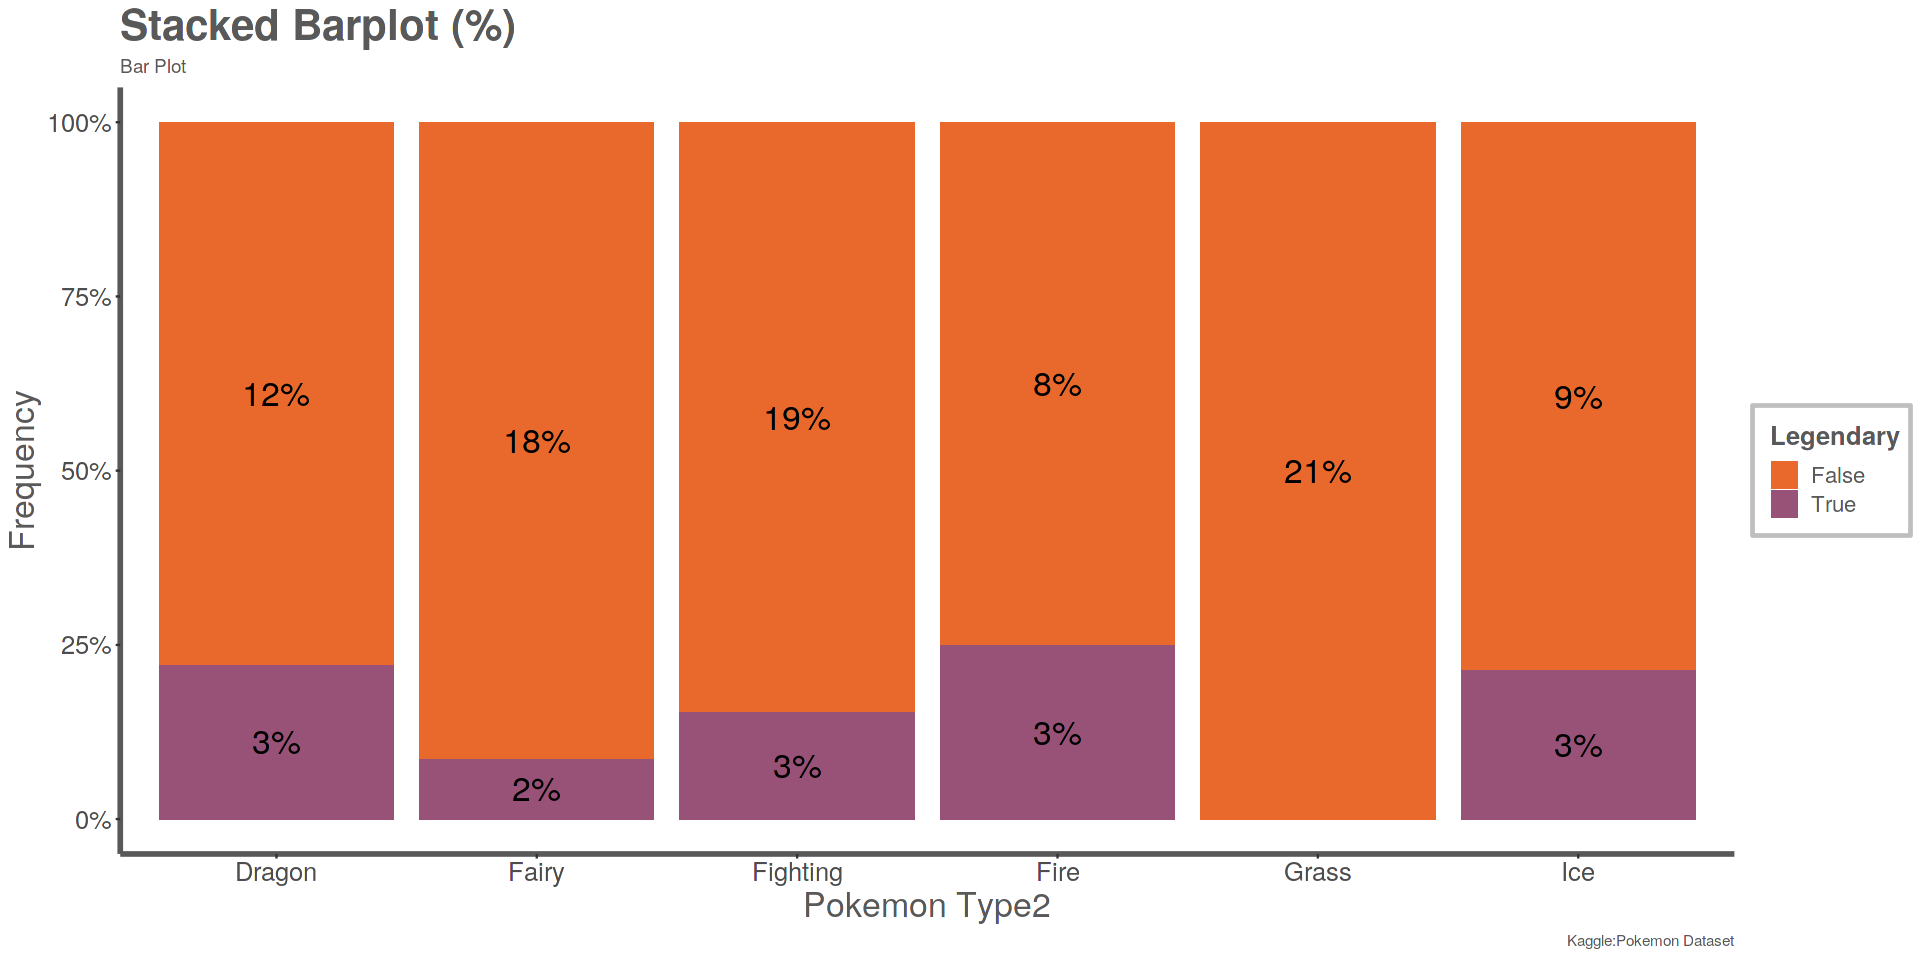

In [22]:
options(repr.plot.width=16, repr.plot.height=8)

pokemon %>%  
  filter(Type.2 %in% c("Fire", "Dragon", "Fighting", "Fairy", "Ice", "Grass")) %>% 
  ggplot(aes(x = Type.2, fill = Legendary)) +
  geom_bar(stat = "count", position = "fill") +
  geom_text(aes(label=scales::percent(..count../sum(..count..))), stat='count',position=position_fill(vjust=0.5),
           size = 7) +
  scale_y_continuous(labels = scales::percent) +
  scale_fill_manual(values = c(colorsPuYe[6], colorsPuYe[2])) +
  theme_classic() + 
  my_theme +
  labs(x = "Pokemon Type2", y = "Frequency", title = "Stacked Barplot (%)", subtitle = "Bar Plot", caption = "Kaggle:Pokemon Dataset")

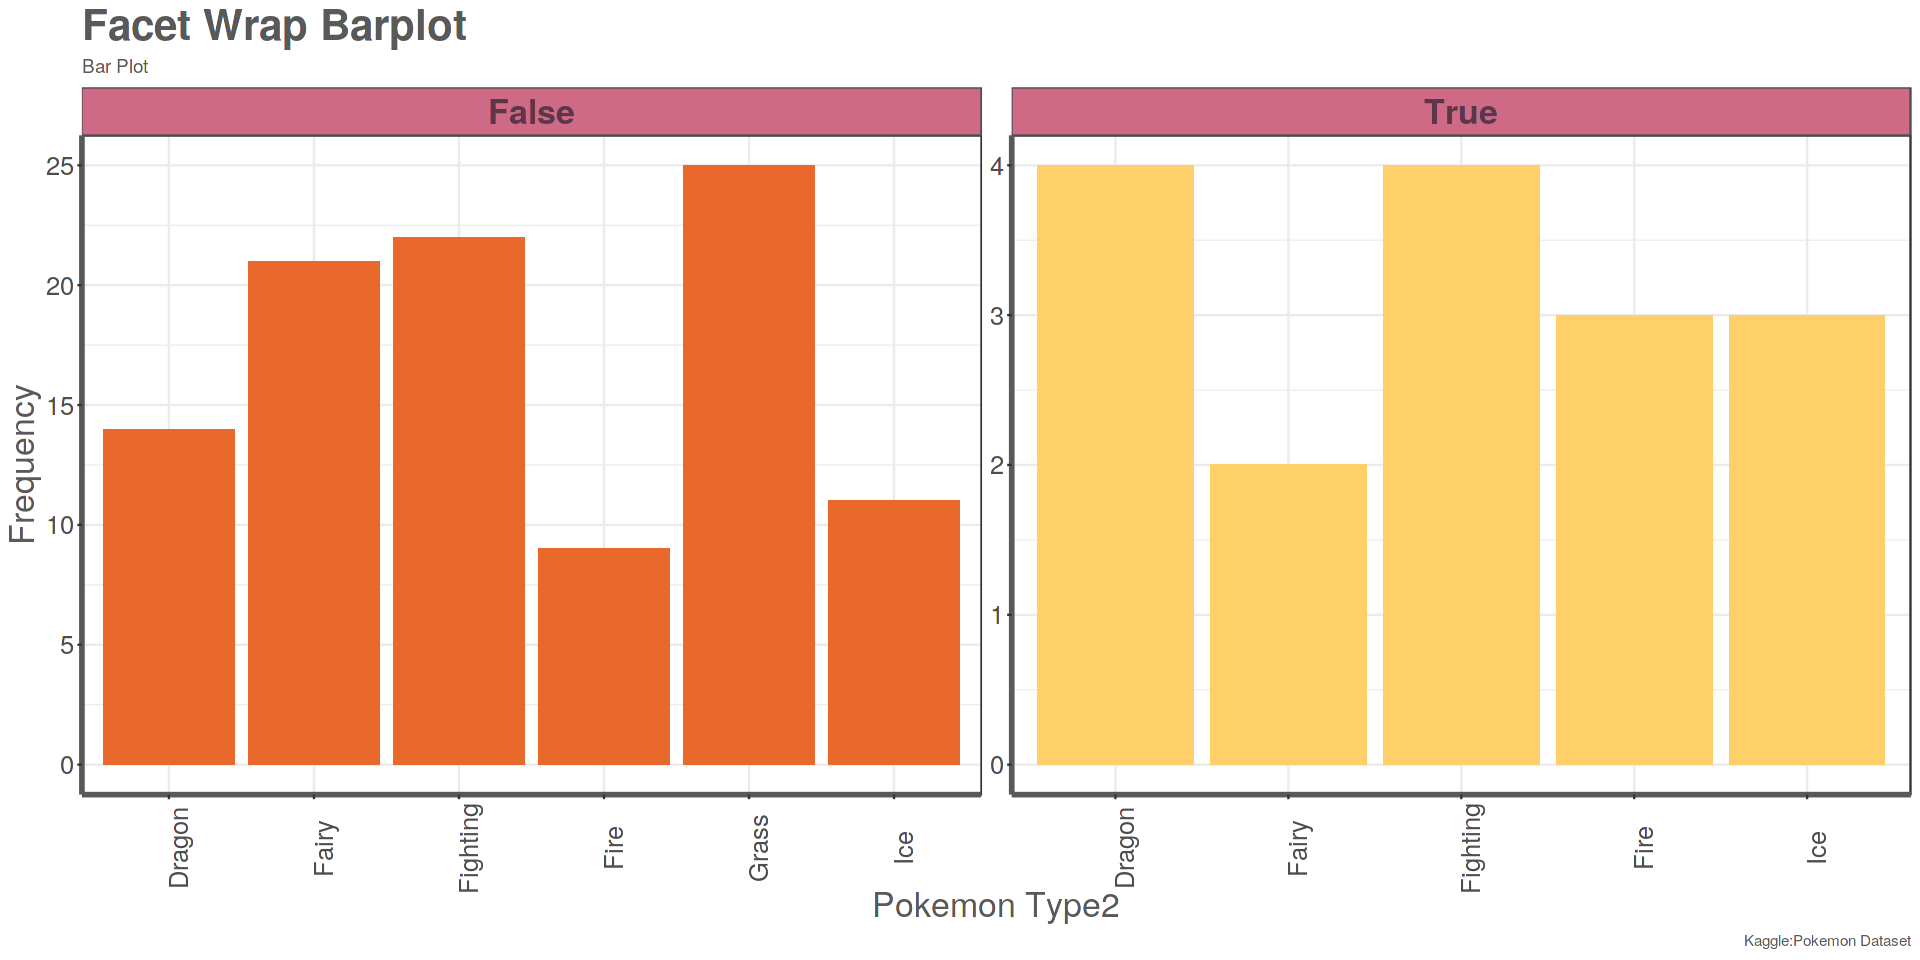

In [23]:
options(repr.plot.width=16, repr.plot.height=8)

pokemon %>%  
  filter(Type.2 %in% c("Fire", "Dragon", "Fighting", "Fairy", "Ice", "Grass")) %>% 
  
  ggplot(aes(x = Type.2, fill = Legendary)) +
  geom_bar(stat = "count", position = "stack") +
  facet_wrap(~Legendary, scales = "free") +
  scale_fill_manual(values = c(colorsPuYe[6], colorsPuYe[4]), guide = "none") +
  theme_bw() + 
  my_theme + 
  theme(strip.background = element_rect(colour = "grey30", fill = colorsPuYe[3]),
        strip.text.x = element_text(colour = colorsPuYe[1], face = "bold"),
        axis.text.x = element_text(angle = 90),
        strip.text = element_text(size=20)) +
  labs(x = "Pokemon Type2", y = "Frequency", title = "Facet Wrap Barplot", subtitle = "Bar Plot", caption = "Kaggle:Pokemon Dataset")

# 5. Histograms

Warning message:
“Ignoring unknown parameters: bins”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



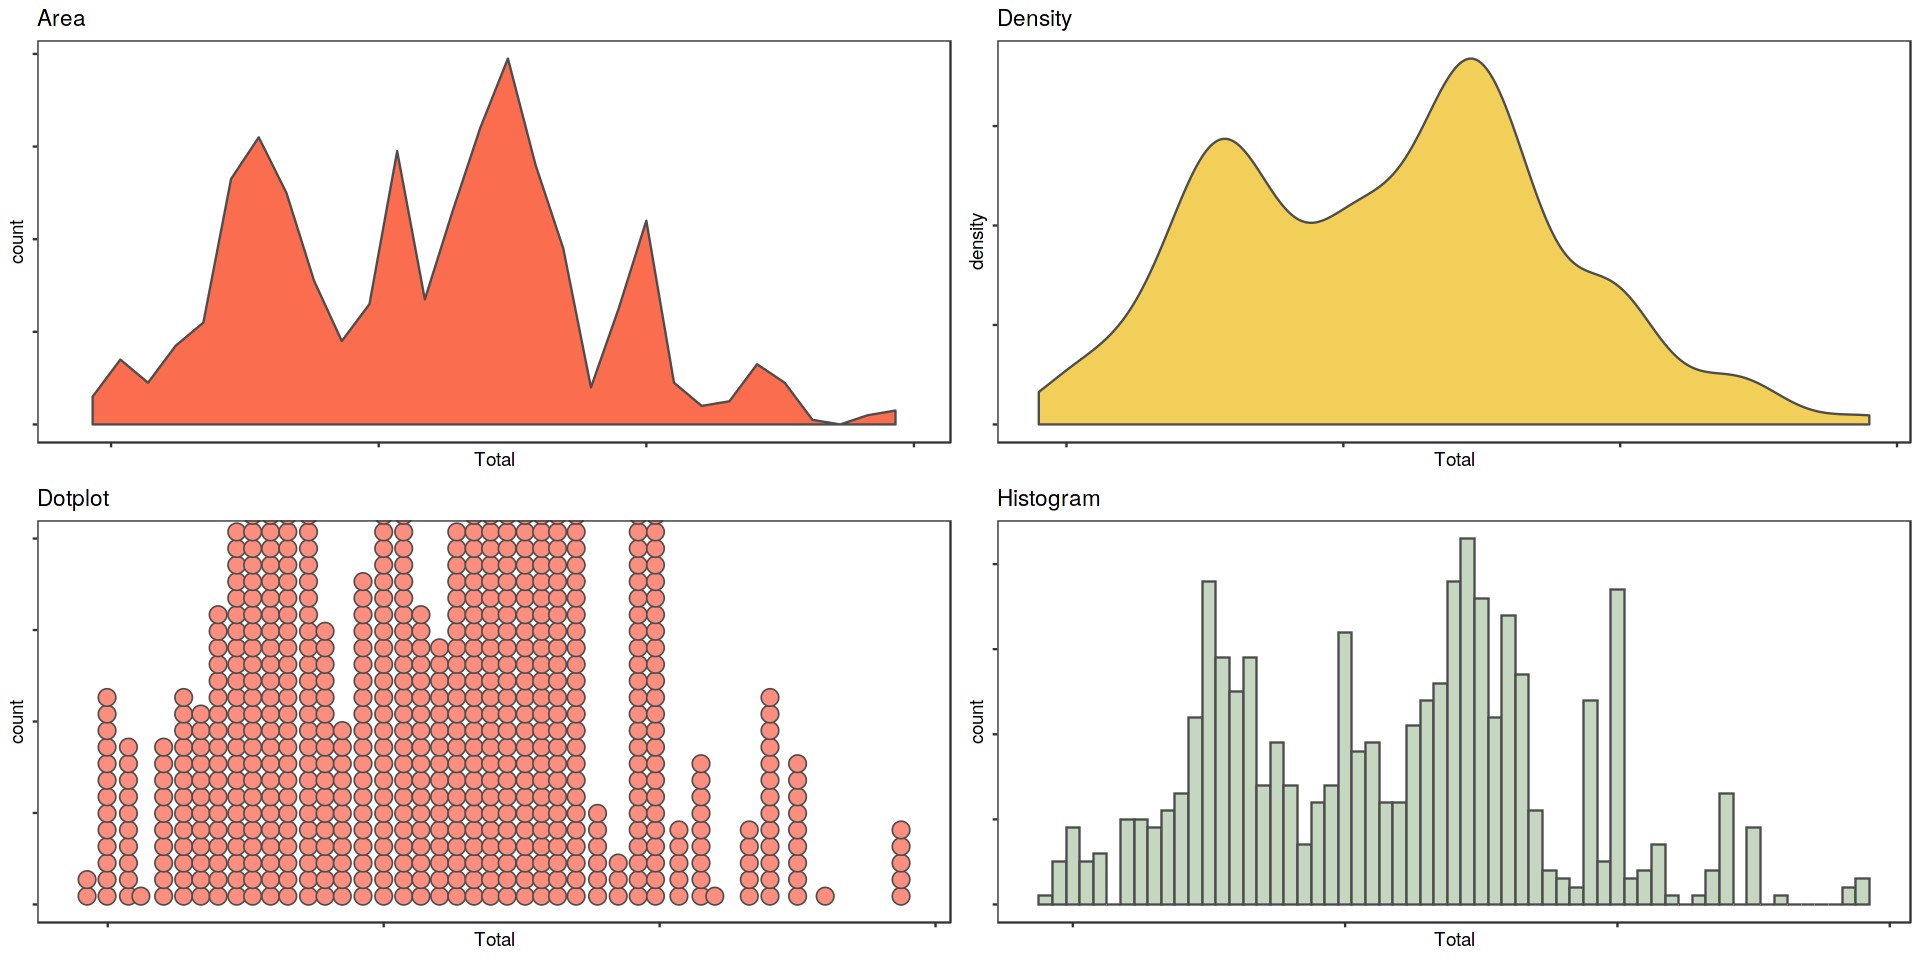

In [24]:
p1 <- pokemon %>% 
  ggplot(aes(x = Total)) +
  geom_area(stat = "bin", color = "grey30", fill = colorsPastels[1]) +
  theme_test() +
  labs(title = "Area") +
  theme(axis.text = element_blank())

p2 <- pokemon %>% 
  ggplot(aes(x = Total)) +
  geom_density(color = "grey30", fill = colorsPastels[2]) +
  theme_test() +
  labs(title = "Density") +
  theme(axis.text = element_blank())

p3 <- pokemon %>% 
  ggplot(aes(x = Total)) +
  geom_dotplot(color = "grey30", fill = colorsPastels[3], binwidth = 12, bins = 50) +
  theme_test() +
  labs(title = "Dotplot") +
  theme(axis.text = element_blank())

p4 <- pokemon %>% 
  ggplot(aes(x = Total)) +
  geom_histogram(color = "grey30", fill = colorsPastels[4], binwidth = 10) +
  theme_test() +
  labs(title = "Histogram") +
  theme(axis.text = element_blank())

options(repr.plot.width=16, repr.plot.height=8)
grid.arrange(p1, p2, p3, p4, ncol = 2)

In [25]:
total_mean <- pokemon %>%
  group_by(Legendary) %>% 
  summarise(mean = mean(Total)) %>% 
  as.matrix()

total_mean

Legendary mean    
[1,] False     417.2136
[2,] True      637.3846

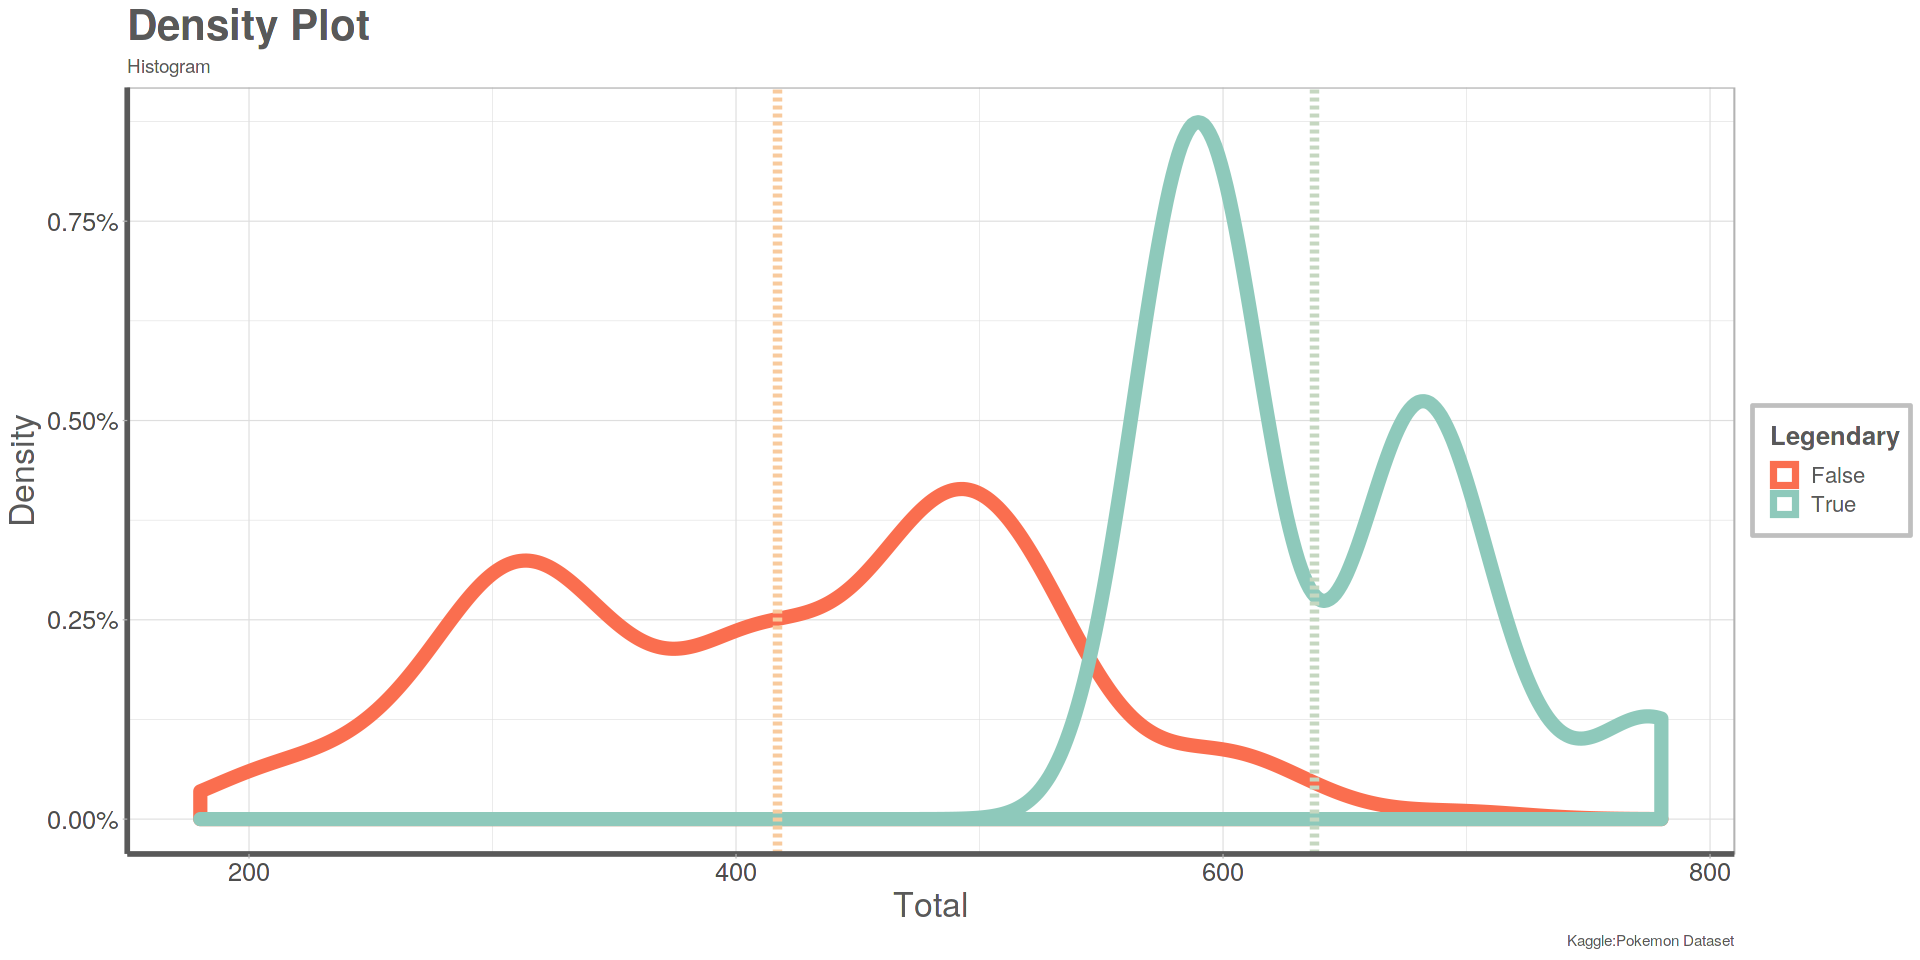

In [26]:
options(repr.plot.width=16, repr.plot.height=8)

pokemon %>% 
  ggplot(aes(x = Total, color = Legendary)) +
  geom_density(size = 3) +
  theme_light() + my_theme +
  labs(x = "Total", y = "Density", title = "Density Plot", subtitle = "Histogram", caption = "Kaggle:Pokemon Dataset") +
  scale_y_continuous(labels = scales::percent) +
  scale_color_manual(values = c(colorsPastels[1], colorsPastels[5])) +
  geom_vline(xintercept = as.numeric(total_mean[3]), size = 2, color = colorsPastels[6], linetype = "dashed") +
  geom_vline(xintercept = as.numeric(total_mean[4]), size = 2, color = colorsPastels[4], linetype = "dashed")

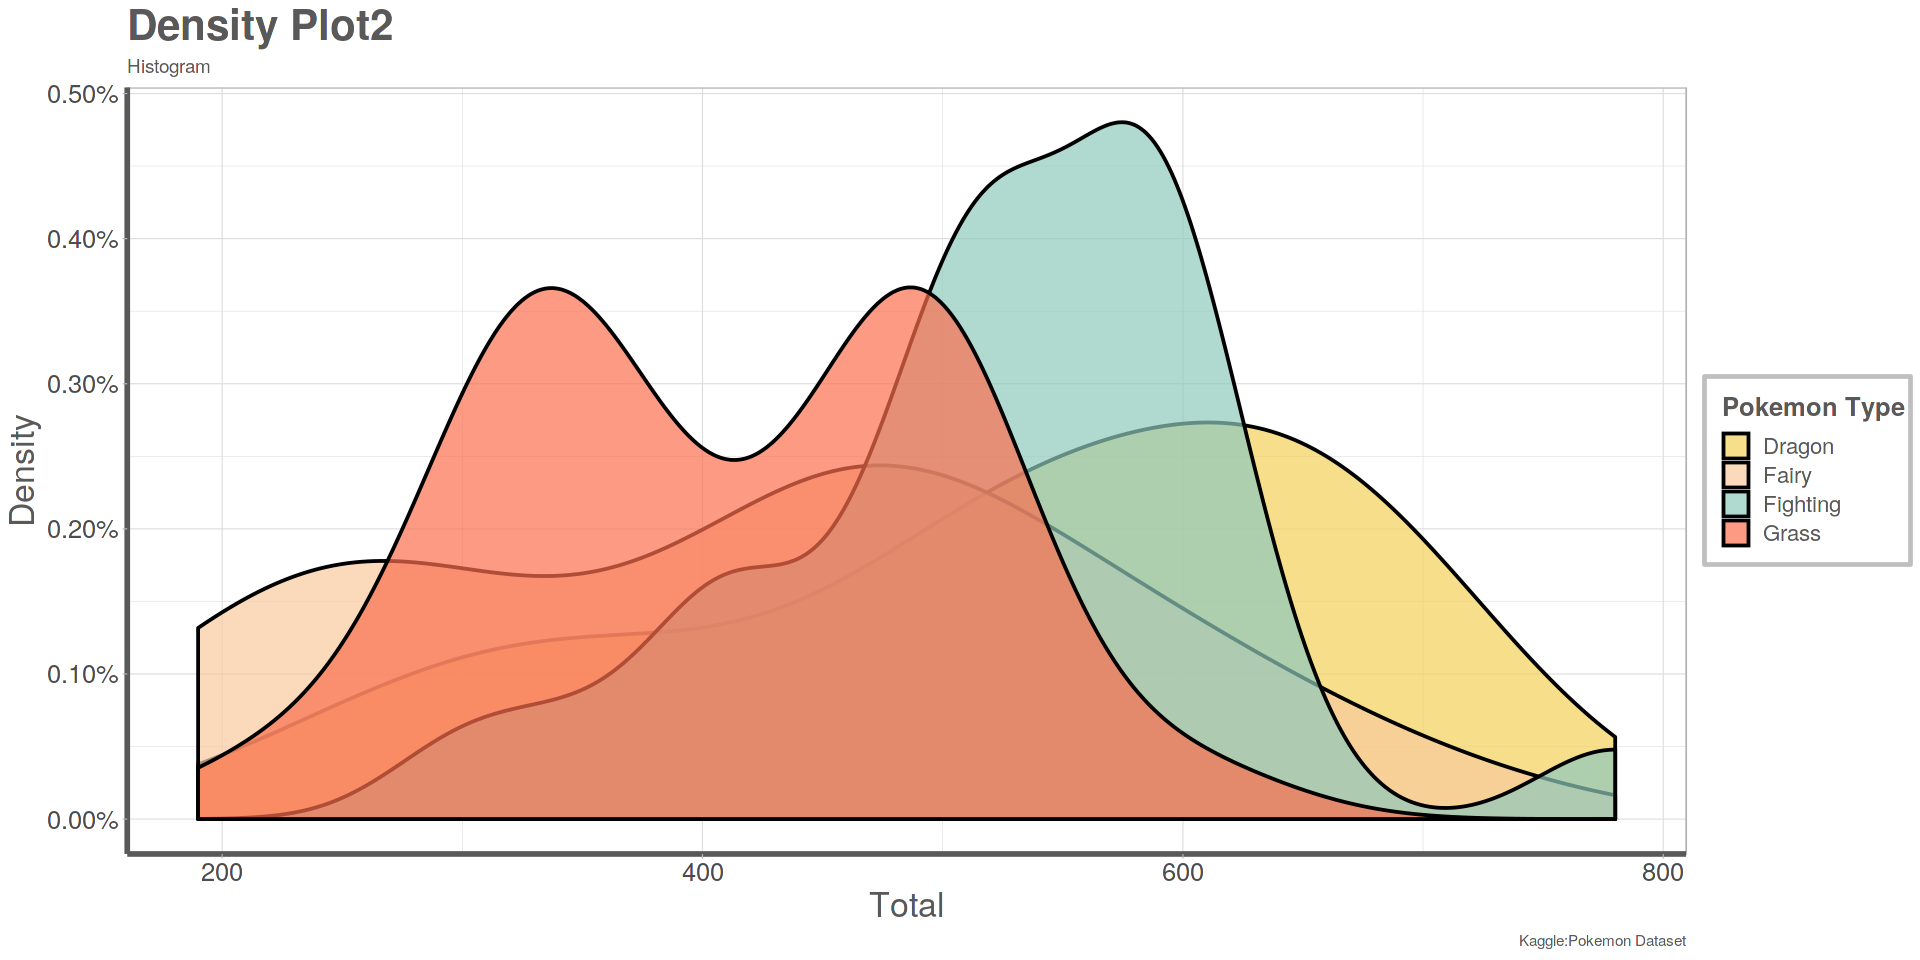

In [27]:
options(repr.plot.width=16, repr.plot.height=8)

pokemon %>% 
  filter(Type.2 %in% c("Dragon", "Fighting", "Fairy", "Grass")) %>% 

  ggplot(aes(x = Total, fill = Type.2)) +
  geom_density(size = 0.8, alpha = 0.7) +
  theme_light() + 
  my_theme +
  labs(x = "Total", y = "Density", title = "Density Plot2", subtitle = "Histogram", caption = "Kaggle:Pokemon Dataset",
       fill = "Pokemon Type") +
  scale_y_continuous(labels = scales::percent) +
  scale_fill_manual(values = c(colorsPastels[2], colorsPastels[6], colorsPastels[5], colorsPastels[1]))

# 6. Boxplots

Warning message:
“Ignoring unknown parameters: bins, size”
Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”


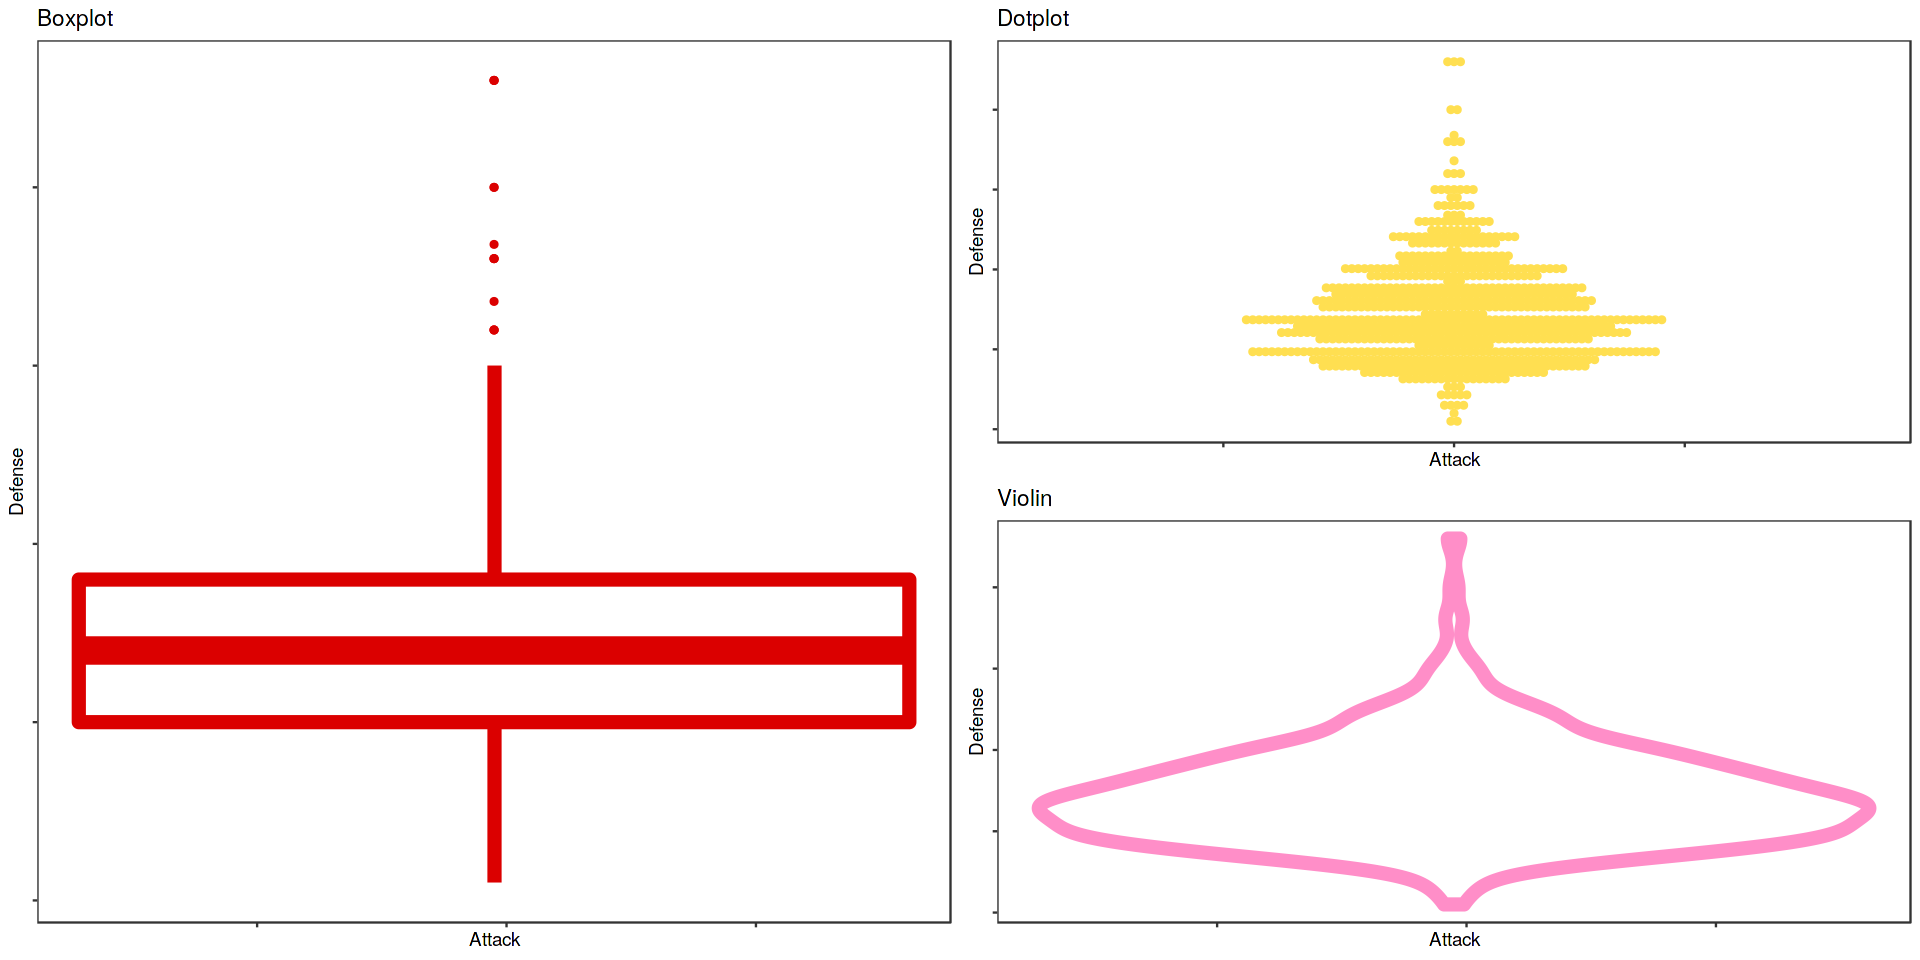

In [28]:
p1 <- pokemon %>% 
  ggplot(aes(x = Attack)) +
  geom_boxplot(aes(y = Defense), color = colorsRainbow[6], size = 3) +
  theme_test() + 
  labs(title = "Boxplot") + 
  theme(axis.text = element_blank())

p2 <- pokemon %>% 
  ggplot(aes(x = Attack, y = Defense)) +
  geom_dotplot(binaxis = "y", stackdir = "center", color = colorsRainbow[2],  fill = colorsRainbow[2], 
               bins = 10, binwidth = 4, size = 3) +
  theme_test() + 
  labs(title = "Dotplot") + 
  theme(axis.text = element_blank())

p3 <- pokemon %>% 
  ggplot(aes(x = Attack)) +
  geom_violin(aes(y = Defense), color = colorsRainbow[1], size = 3) +
  theme_test() + 
  labs(title = "Violin") + 
  theme(axis.text = element_blank())

options(repr.plot.width=16, repr.plot.height=8)
grid.arrange(p1,p2,p3, layout_matrix = rbind(c(1,2),c(1,3)))

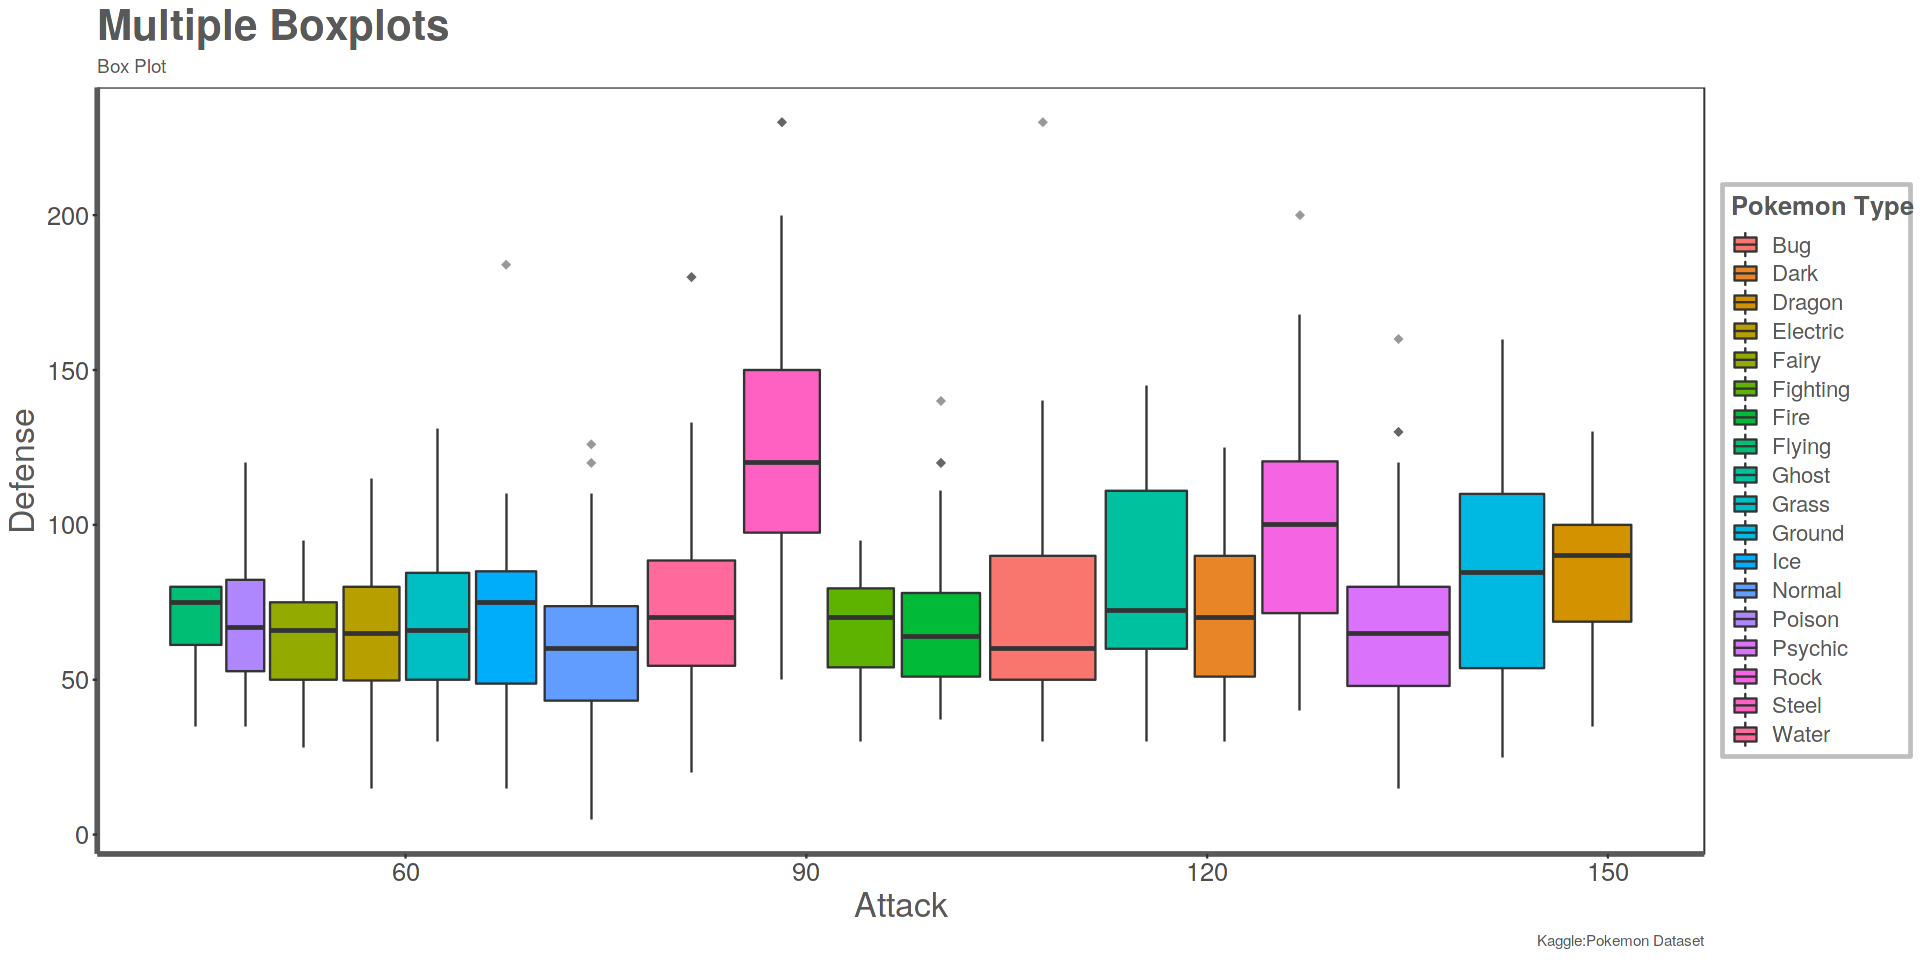

In [29]:
options(repr.plot.width=16, repr.plot.height=8)

pokemon %>% 
  ggplot(aes(x = Attack, y = Defense)) +
  geom_boxplot(aes(fill = Type.1), outlier.fill = "grey35", outlier.shape = 18, outlier.alpha = 0.5, outlier.size = 2.5) + 
  theme_test() + 
  my_theme +
  labs(x = "Attack", y = "Defense", title = "Multiple Boxplots", subtitle = "Box Plot", caption = "Kaggle:Pokemon Dataset",
       fill = "Pokemon Type")

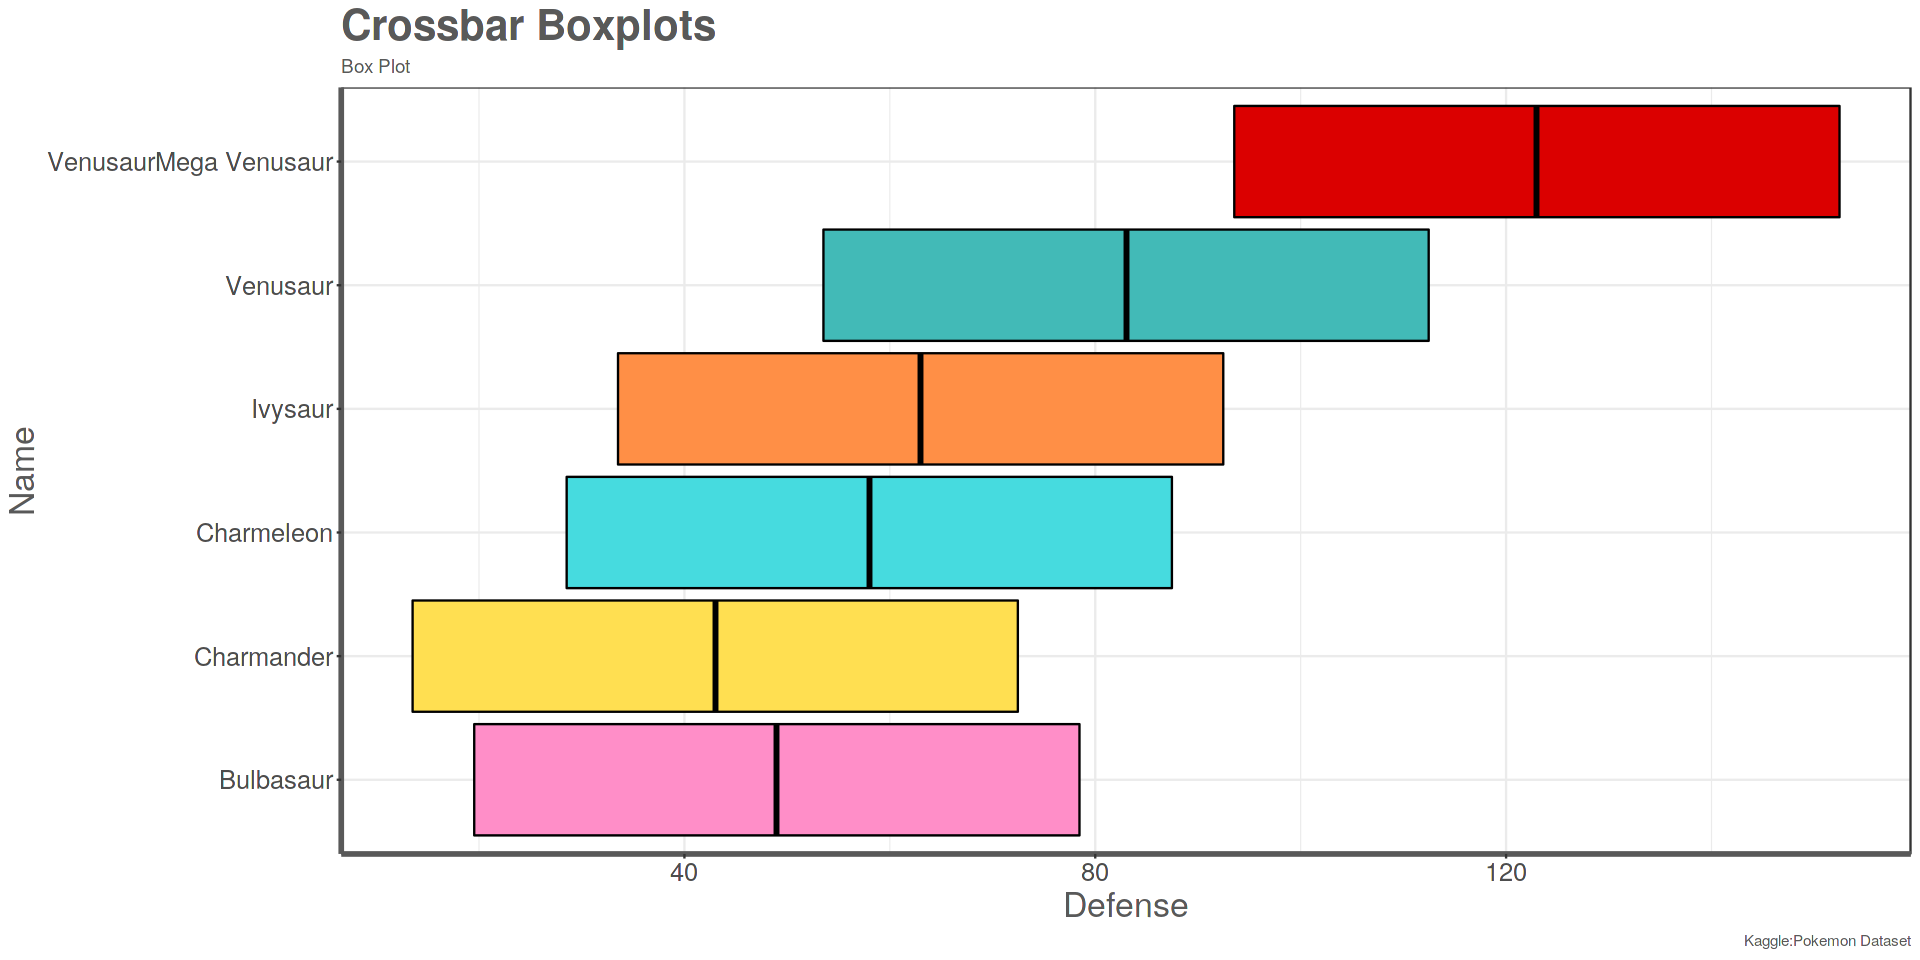

In [30]:
options(repr.plot.width=16, repr.plot.height=8)

pokemon %>% 
  head(6) %>% 

  ggplot(aes(x = Name, y = Defense, ymin = Defense-sd(Defense), ymax = Defense+sd(Defense))) +
  geom_crossbar(aes(fill = as.factor(Name))) +
  theme_bw() + 
  my_theme +
  coord_flip() + 
  scale_fill_manual(values = colorsRainbow, guide = "none") +
  labs(x = "Name", y = "Defense", title = "Crossbar Boxplots", subtitle = "Box Plot", caption = "Kaggle:Pokemon Dataset",
       fill = "Pokemon Name")

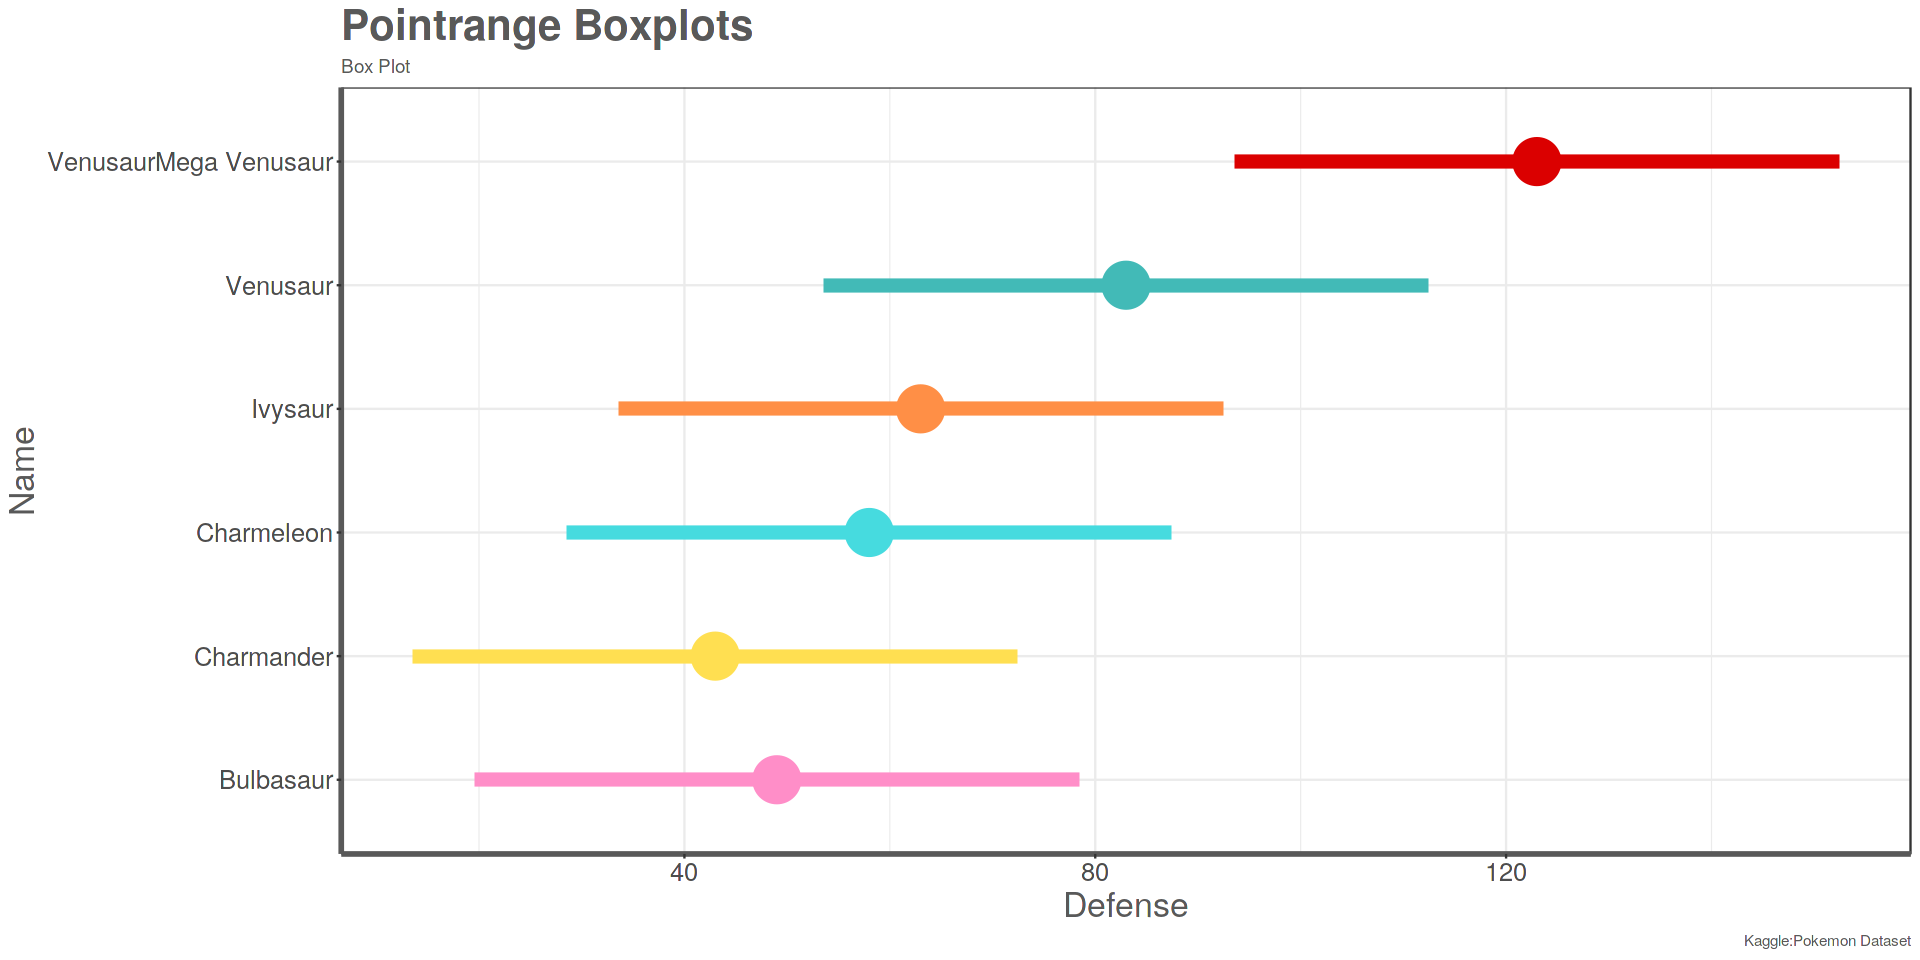

In [31]:
options(repr.plot.width=16, repr.plot.height=8)

pokemon %>% 
  head(6) %>% 

  ggplot(aes(x = Name, y = Defense, ymin = Defense-sd(Defense), ymax = Defense+sd(Defense))) +
  geom_pointrange(aes(color = as.factor(Name)), size = 3) +
  theme_bw() + 
  my_theme +
  coord_flip() + 
  scale_color_manual(values = colorsRainbow, guide = "none") +
  labs(x = "Name", y = "Defense", title = "Pointrange Boxplots", subtitle = "Box Plot", caption = "Kaggle:Pokemon Dataset",
       fill = "Pokemon Name")

Warning message:
“Ignoring unknown parameters: bins”


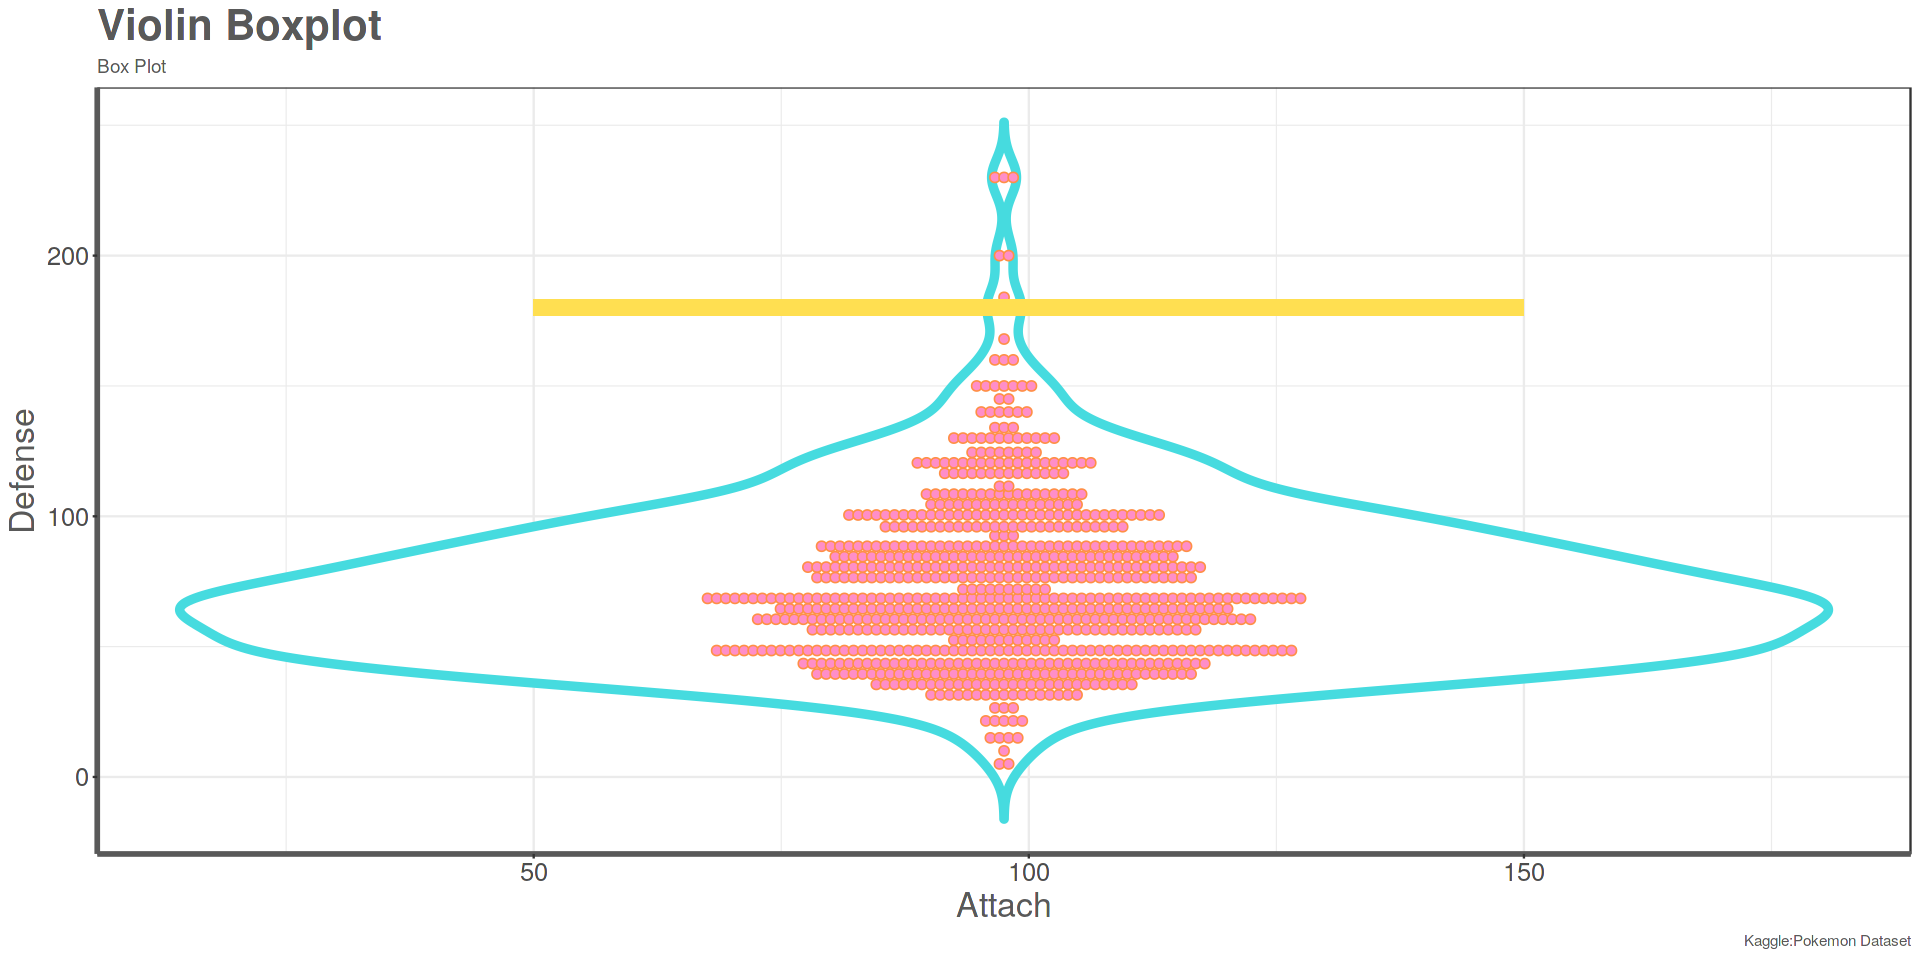

In [32]:
options(repr.plot.width=16, repr.plot.height=8)

pokemon %>% 
  ggplot(aes(x = Attack, y = Defense)) +
  geom_violin(trim = F, size = 2, color = colorsRainbow[3]) +
  geom_dotplot(binaxis = "y", stackdir = "center", color = colorsRainbow[4], fill = colorsRainbow[1],
               bins = 10, binwidth = 3.5) +
  theme_bw() + 
  my_theme +
  labs(x = "Attach", y = "Defense", title = "Violin Boxplot", subtitle = "Box Plot", caption = "Kaggle:Pokemon Dataset") +
  geom_segment(x = 50, y = 180, xend = 150, yend = 180, size = 3.5, color = colorsRainbow[2])

## Update: Some Bonus Stuff

### Fancy Arrow Plot

In [33]:
# Special theme for this plot
new_theme  <- theme(plot.background = element_rect(fill = "grey97", color = "grey25"),
        panel.background = element_rect(fill = "grey97"),
        panel.grid.major = element_line(colour = "grey87"),
        text = element_text(color = "grey25"),
        plot.title = element_text(size = 25),
        plot.subtitle = element_text(size = 20),
        axis.title = element_text(size = 15),
        axis.text = element_text(size = 15),
        legend.box.background = element_rect(color = "grey25", fill = "grey97", size = 0.5),
        legend.box.margin = margin(t = 5, r = 5, b = 5, l = 5))

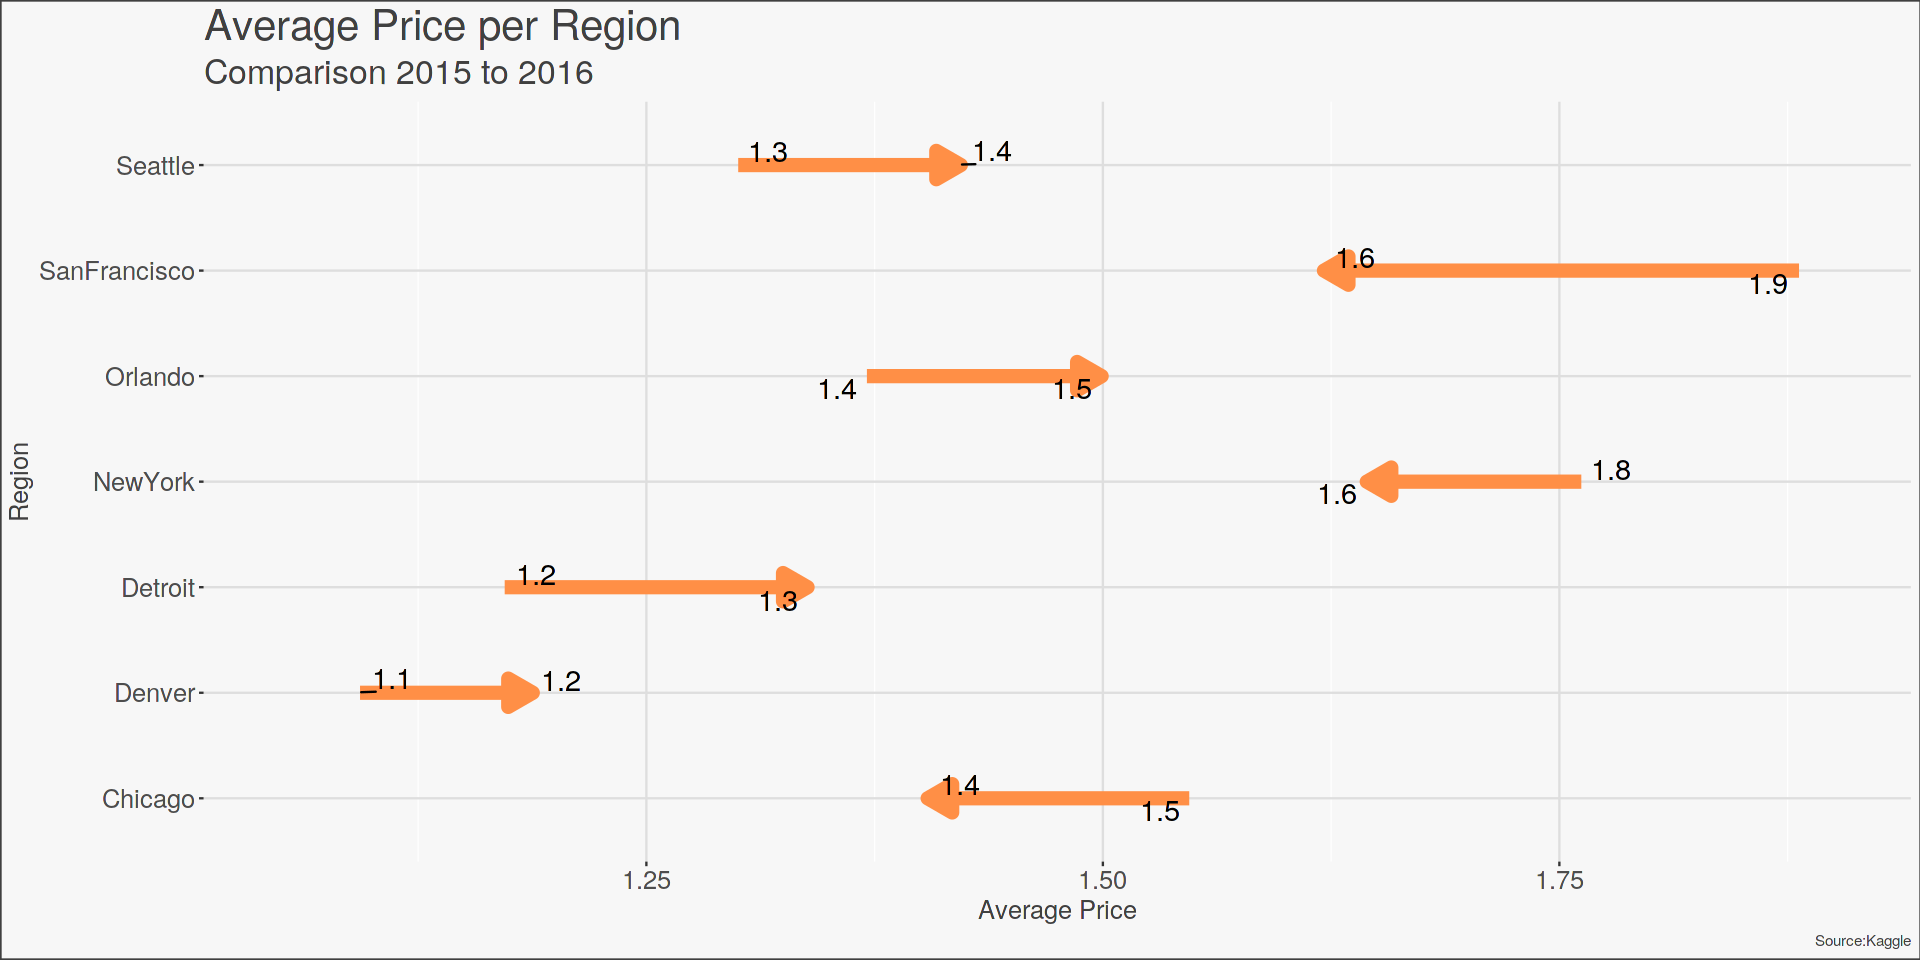

In [34]:
avocado$year <- substring(avocado$Date,1,4)
options(repr.plot.width=16, repr.plot.height=8)

avocado %>% 
    select(Date, AveragePrice, region, year) %>% 
    filter(Date >= "2015-01-01" & Date <= "2016-12-30") %>% 
    group_by(year, region) %>% 
    summarise(avgPrice = mean(AveragePrice)) %>% 
    filter(region %in% c('SanFrancisco', 'Chicago', 'Denver', 'Detroit', 'NewYork', 'Orlando', 'Seattle')) %>% 
    
    ggplot() +
    geom_path(aes(x = avgPrice, y = as.factor(region)), arrow = arrow(length = unit(6, "mm"), type = "closed", ends = "first"),
            color = colorsRainbow[4], size = 3) +
    geom_text_repel(aes(x = avgPrice, y = as.factor(region), label = round(avgPrice, 1)),
                    size = 6, point.padding = 0.1) +
    coord_cartesian(xlim = c(1.05, 1.9)) +
    labs(x = "Average Price", y = "Region", title = "Average Price per Region", subtitle = "Comparison 2015 to 2016",
       caption = "Source:Kaggle") +
    new_theme

### Pie Chart

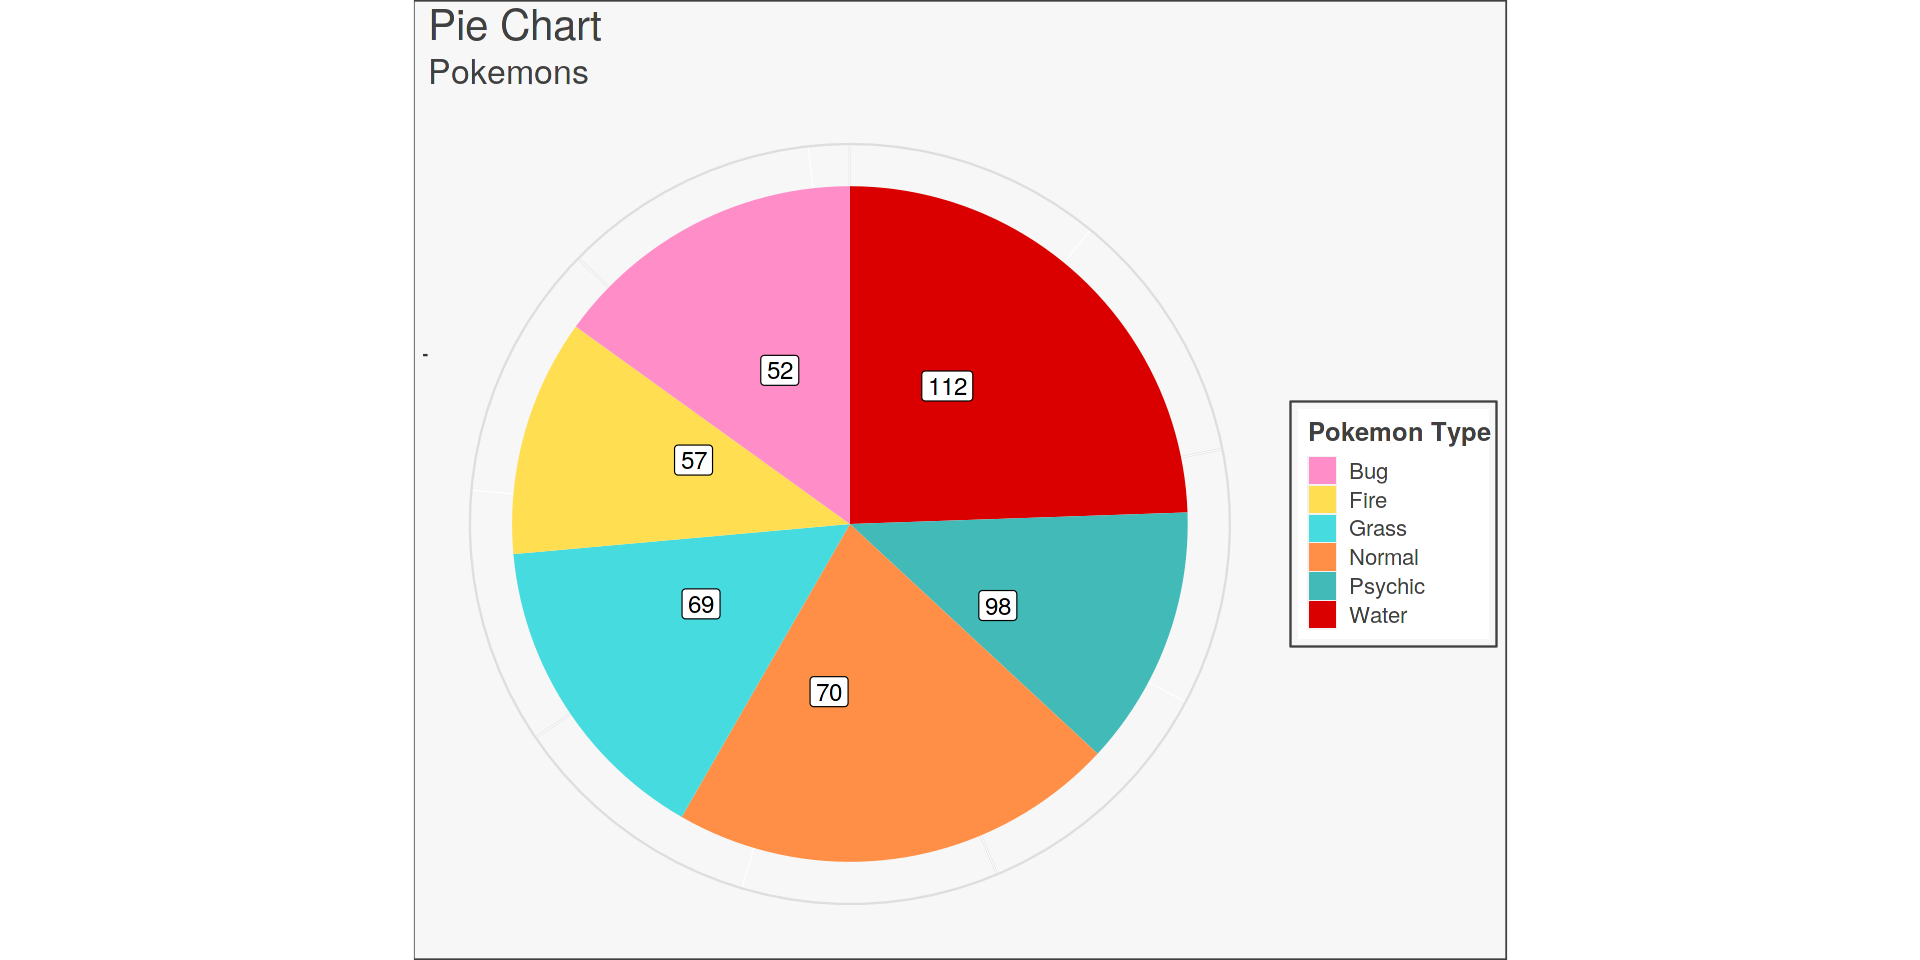

In [35]:
options(repr.plot.width=16, repr.plot.height=8)

pokemon %>% 
    filter(Type.1 %in% c("Water", "Normal", "Grass", "Bug", "Psychic", "Fire")) %>% 
    group_by(Type.1) %>% 
    summarise(n = n()) %>% 
    arrange(desc(n)) %>% 
    
    ggplot(aes(x = "", y = n)) +
    geom_bar(stat = "identity", aes(fill = as.factor(Type.1)), position = "stack") +
    coord_polar("y", start=0) +

    geom_label(aes(y = n/2.5 + c(0, cumsum(n)[-length(n)]), label = formatC(n, format="f", big.mark=",", digits=0)), size=5) +
    scale_fill_manual(values = colorsRainbow) +
    new_theme + theme(axis.text = element_blank(), axis.title = element_blank(),
                      legend.title = element_text(face = "bold", size = 15),
                      legend.text = element_text(size=13)) +
    labs(title = "Pie Chart", subtitle = "Pokemons", fill = "Pokemon Type")

<div class="alert alert-block alert-info">
<p>Upvote if you found this helpful! 😁<p>
<b>Cheers!<b>
</div>